In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Population_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [4]:
df.head()

Region  Office Location Id   Indians Foreigners Indian_Male  \
0  Region 31                   1  6,43,596  28,83,782    4,40,445   
1  Region 17                   9  3,19,933  15,01,899    2,13,477   
2  Region 12                   4  1,94,379   6,50,744    1,61,803   
3  Region 22                  15  1,07,360   4,70,708      85,343   
4  Region 23                  13    55,351   3,29,980      31,796   

  Indian_Female Foreigners_Male Foreigners_Female Total Population  
0      2,03,151       27,63,718            72,515        35,27,378  
1      1,06,456       14,49,303            27,671          1821832  
2        32,576        6,31,660            10,652           845123  
3        22,017        4,50,267             6,389           578068  
4        23,555        3,25,105             3,684           385331

In [5]:
num_col=['Indians','Foreigners','Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female','Total Population']

In [6]:
def replace(v):
    return (v.replace(',',''))

In [7]:
for i in num_col:
    df[i]=df[i].apply(replace)

In [8]:
df.head()

Region  Office Location Id Indians Foreigners Indian_Male Indian_Female  \
0  Region 31                   1  643596    2883782      440445        203151   
1  Region 17                   9  319933    1501899      213477        106456   
2  Region 12                   4  194379     650744      161803         32576   
3  Region 22                  15  107360     470708       85343         22017   
4  Region 23                  13   55351     329980       31796         23555   

  Foreigners_Male Foreigners_Female Total Population  
0         2763718             72515          3527378  
1         1449303             27671          1821832  
2          631660             10652           845123  
3          450267              6389           578068  
4          325105              3684           385331

In [9]:
df[num_col]=df[num_col].astype('int64')

In [10]:
df['Office Location Id']=df['Office Location Id'].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Region              38 non-null     object  
 1   Office Location Id  38 non-null     category
 2   Indians             38 non-null     int64   
 3   Foreigners          38 non-null     int64   
 4   Indian_Male         38 non-null     int64   
 5   Indian_Female       38 non-null     int64   
 6   Foreigners_Male     38 non-null     int64   
 7   Foreigners_Female   38 non-null     int64   
 8   Total Population    38 non-null     int64   
dtypes: category(1), int64(7), object(1)
memory usage: 3.9+ KB


In [12]:
cat_col=['Region','Office Location Id']
cat_col

['Region', 'Office Location Id']

In [13]:
variance=[[str(i),(df[i].nunique()/len(df))*100] for i in cat_col]
variance

[['Region', 100.0], ['Office Location Id', 100.0]]

In [14]:
df=df.drop(['Region','Office Location Id'],axis=1)

In [15]:
df.head()

Indians  Foreigners  Indian_Male  Indian_Female  Foreigners_Male  \
0   643596     2883782       440445         203151          2763718   
1   319933     1501899       213477         106456          1449303   
2   194379      650744       161803          32576           631660   
3   107360      470708        85343          22017           450267   
4    55351      329980        31796          23555           325105   

   Foreigners_Female  Total Population  
0              72515           3527378  
1              27671           1821832  
2              10652            845123  
3               6389            578068  
4               3684            385331

In [16]:
#  Indians and Foreigners sum

diff1=[]
row_sum=df[['Indians','Foreigners']].sum(axis=1)
for i,j in enumerate(row_sum):
    a=df['Total Population'][i]-j
    diff1.append(a)

#  Male and Female sum

diff2=[]
indians_m_f_sum=df[['Indian_Male','Indian_Female']].sum(axis=1)
foreigners_m_f_sum=df[['Foreigners_Male','Foreigners_Female']].sum(axis=1)


for i in range(len(df)):
    b=df['Total Population'][i]-(indians_m_f_sum[i]+foreigners_m_f_sum[i])
    diff2.append(b)

difference=pd.DataFrame({'difference_indians_foreigners_m_f':diff2})

difference=pd.DataFrame({'Indians':df['Indians'],
                        'Foreigners':df['Foreigners'],
                        'Total Population':df['Total Population'],
                        'difference_indians_foreigners':diff1,
                        'indians_m_f_sum':indians_m_f_sum,
                        'foreigners_m_f_sum':foreigners_m_f_sum,
                        'difference_indians_foreigners_m_f':diff2})

In [17]:
difference.head()

Indians  Foreigners  Total Population  difference_indians_foreigners  \
0   643596     2883782           3527378                              0   
1   319933     1501899           1821832                              0   
2   194379      650744            845123                              0   
3   107360      470708            578068                              0   
4    55351      329980            385331                              0   

   indians_m_f_sum  foreigners_m_f_sum  difference_indians_foreigners_m_f  
0           643596             2836233                              47549  
1           319933             1476974                              24925  
2           194379              642312                               8432  
3           107360              456656                              14052  
4            55351              328789                               1191

In [18]:
difference['indians:foreigners']=difference['indians_m_f_sum']/difference['foreigners_m_f_sum']

In [19]:
difference.head()

Indians  Foreigners  Total Population  difference_indians_foreigners  \
0   643596     2883782           3527378                              0   
1   319933     1501899           1821832                              0   
2   194379      650744            845123                              0   
3   107360      470708            578068                              0   
4    55351      329980            385331                              0   

   indians_m_f_sum  foreigners_m_f_sum  difference_indians_foreigners_m_f  \
0           643596             2836233                              47549   
1           319933             1476974                              24925   
2           194379              642312                               8432   
3           107360              456656                              14052   
4            55351              328789                               1191   

   indians:foreigners  
0            0.226919  
1            0.216614  
2            0.302624  
3            0.235100  
4            0.168348

In [20]:
difference['total_males']=df[['Indian_Male','Foreigners_Male']].sum(axis=1)
difference['total_females']=df[['Indian_Female','Foreigners_Female']].sum(axis=1)

difference['males:females']=difference['total_males']/difference['total_females']

In [21]:
difference.sort_values(by='males:females',ascending=False).head(10)

Indians  Foreigners  Total Population  difference_indians_foreigners  \
33     2067       20183             22250                              0   
23     7237       48138             55375                              0   
5     55044      202485            257529                              0   
24     6720       47642             54362                              0   
28     4093       23876             27969                              0   
35     1212        6084              7296                              0   
34     1867       12424             14291                              0   
22     7542       44088             51630                              0   
26     5635       42795             48430                              0   
6     44727      267200            311927                              0   

    indians_m_f_sum  foreigners_m_f_sum  difference_indians_foreigners_m_f  \
33             2067               20183                                  0   
23             7237               47617                                521   
5             55044              195167                               7318   
24             6720               47505                                137   
28             4093               23784                                 92   
35             1212                6078                                  6   
34             1867               12423                                  1   
22             7542               44063                                 25   
26             5635               42735                                 60   
6             44727              264384                               2816   

    indians:foreigners  total_males  total_females  males:females  
33            0.102413        21842            408      53.534314  
23            0.151984        53103           1751      30.327242  
5             0.282035       242019           8192      29.543335  
24            0.141459        52438           1787      29.344152  
28            0.172090        26954            923      29.202600  
35            0.199408         7040            250      28.160000  
34            0.150286        13739            551      24.934664  
22            0.171164        49589           2016      24.597718  
26            0.131859        46478           1892      24.565539  
6             0.169174       296519          12592      23.548205

In [22]:
df['others']=difference['difference_indians_foreigners_m_f']
df['indians:foreigners']=df['Indians']/df['Foreigners']
df['total_males']=difference['total_males']
df['total_females']=difference['total_females']
df['males:females']=difference['males:females']

In [23]:
df.head()

Indians  Foreigners  Indian_Male  Indian_Female  Foreigners_Male  \
0   643596     2883782       440445         203151          2763718   
1   319933     1501899       213477         106456          1449303   
2   194379      650744       161803          32576           631660   
3   107360      470708        85343          22017           450267   
4    55351      329980        31796          23555           325105   

   Foreigners_Female  Total Population  others  indians:foreigners  \
0              72515           3527378   47549            0.223178   
1              27671           1821832   24925            0.213019   
2              10652            845123    8432            0.298703   
3               6389            578068   14052            0.228082   
4               3684            385331    1191            0.167740   

   total_males  total_females  males:females  
0      3204163         275666      11.623352  
1      1662780         134127      12.397057  
2       793463          43228      18.355302  
3       535610          28406      18.855523  
4       356901          27239      13.102574

In [24]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

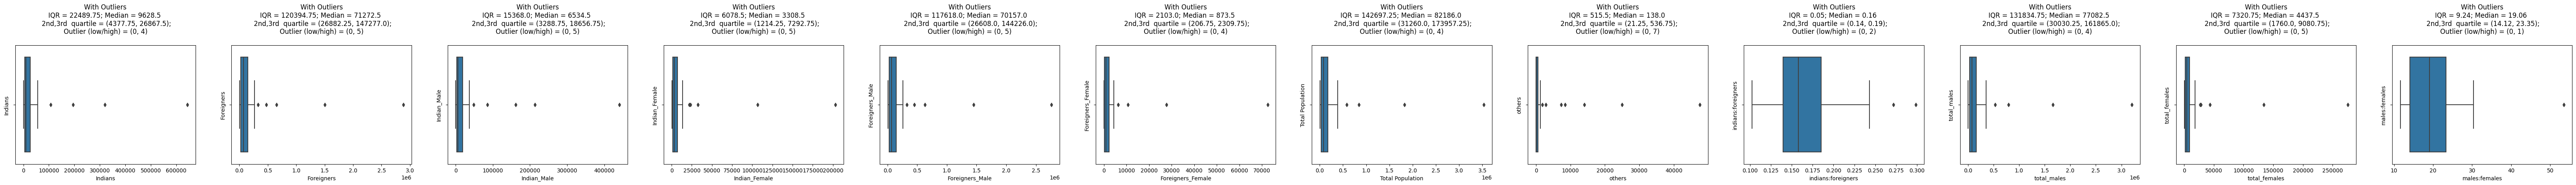

In [25]:
UVA_outlier(df,df.columns)

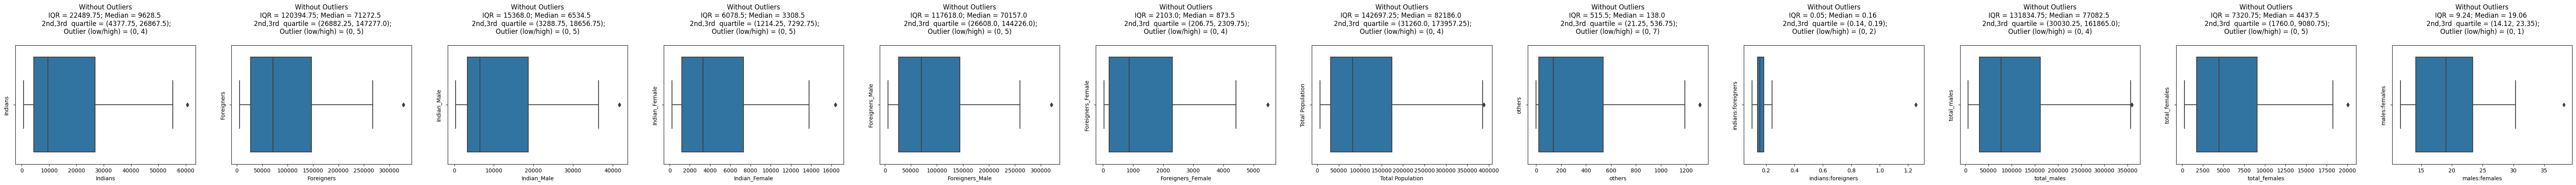

In [26]:
UVA_outlier(df,df.columns,include_outlier=False)

In [27]:
# Bringing data to unit scale

def percent_converter(data, total, columns):
    '''
    expresses the other columns as percentage of the total column
    '''
    for i in columns:
        data[i] = data[i]/data['Total Population']
        
    return data.drop(columns=['Total Population'])

data2 = percent_converter(df,'Total Population', df.drop(columns=['Total Population']).columns)

# checking
data2.head()

Indians  Foreigners  Indian_Male  Indian_Female  Foreigners_Male  \
0  0.182457    0.817543     0.124865       0.057593         0.783505   
1  0.175611    0.824389     0.117177       0.058433         0.795520   
2  0.230001    0.769999     0.191455       0.038546         0.747418   
3  0.185722    0.814278     0.147635       0.038087         0.778917   
4  0.143645    0.856355     0.082516       0.061129         0.843703   

   Foreigners_Female    others  indians:foreigners  total_males  \
0           0.020558  0.013480        6.327016e-08     0.908370   
1           0.015189  0.013681        1.169257e-07     0.912697   
2           0.012604  0.009977        3.534429e-07     0.938873   
3           0.011052  0.024309        3.945590e-07     0.926552   
4           0.009561  0.003091        4.353153e-07     0.926219   

   total_females  males:females  
0       0.078150       0.000003  
1       0.073622       0.000007  
2       0.051150       0.000022  
3       0.049140       0.000033  
4       0.070690       0.000034

In [28]:
## Plotting elbow curve for K-means
from sklearn.cluster import KMeans
SSE = []
for cluster in range(1,10):
    kmeans = KMeans( n_clusters = cluster)
    kmeans.fit(data2)
    SSE.append(kmeans.inertia_)

In [29]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

Text(0, 0.5, 'Inertia')

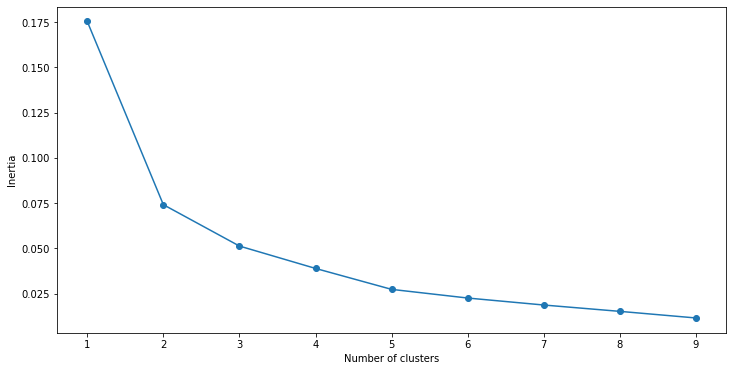

In [30]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [31]:
# Taking clusters as 3 as inferred from elbow curve

kmeans = KMeans(n_clusters=3)
kmeans.fit(data2)
pred=kmeans.predict(data2)

In [32]:
data2['cluster'] = pred

In [33]:
def seg(str_x, str_y, clusters):
    x = []
    y = []

    for i in range(clusters):
        x.append(data2[str_x][data2['cluster']==i])
        y.append(data2[str_y][data2['cluster']==i])
  
    return x,y

def plot_clusters(str_x, str_y, clusters):
    plt.figure(figsize = (5,5), dpi = 120)
  
    x,y = seg(str_x, str_y, clusters)

    for i in range(clusters):
        plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
  
        plt.xlabel(str_x)
        plt.ylabel(str_y)
        plt.title(str(str_x+" Vs "+str_y))
        plt.legend()

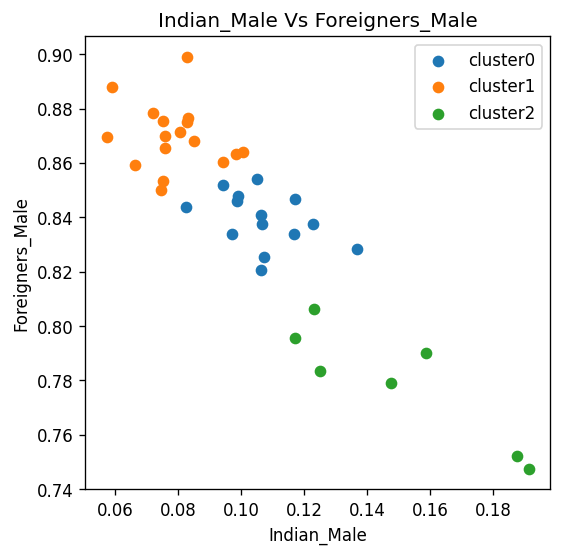

In [34]:
plot_clusters('Indian_Male', 'Foreigners_Male',3)

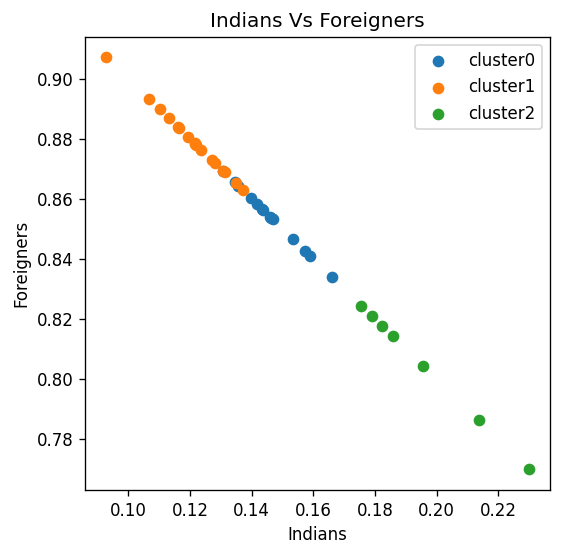

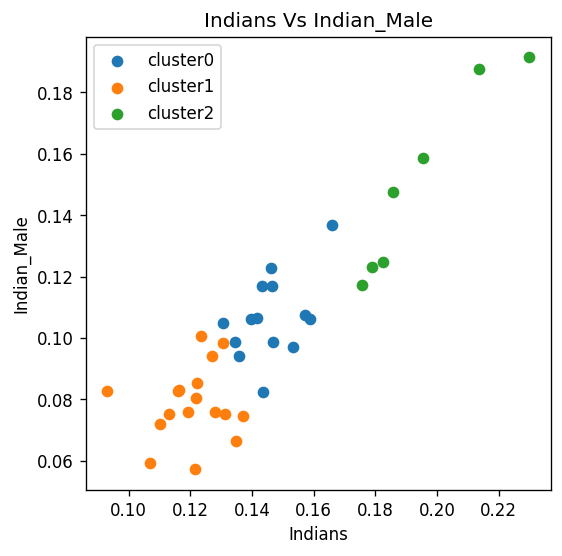

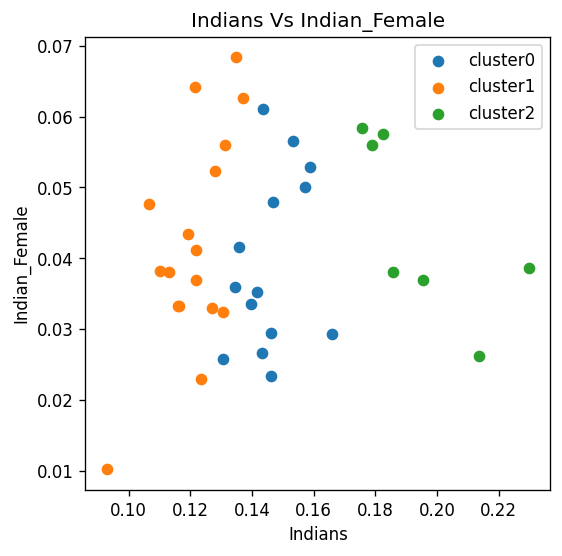

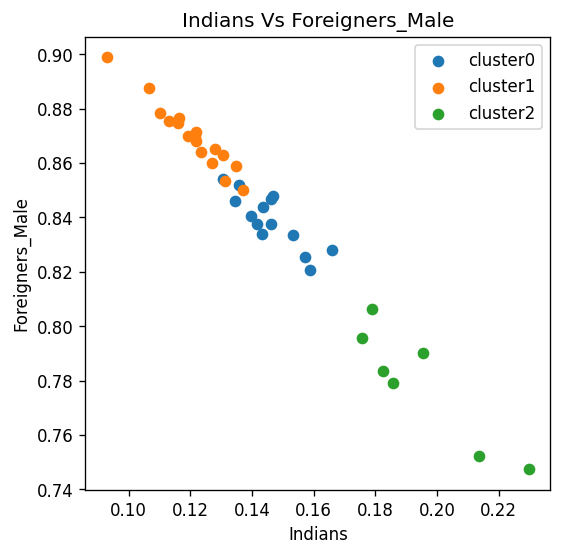

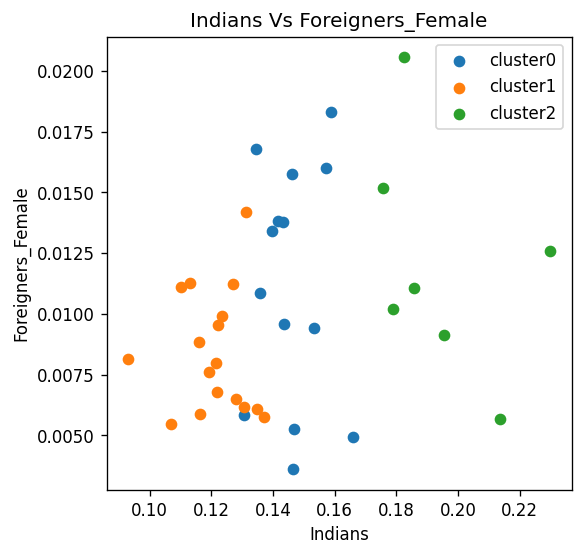

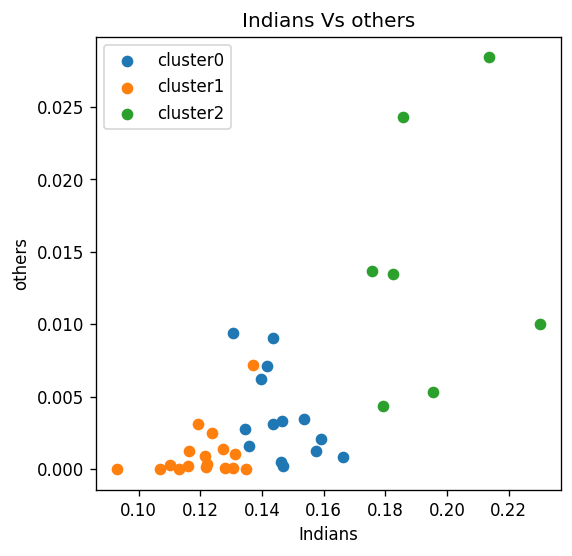

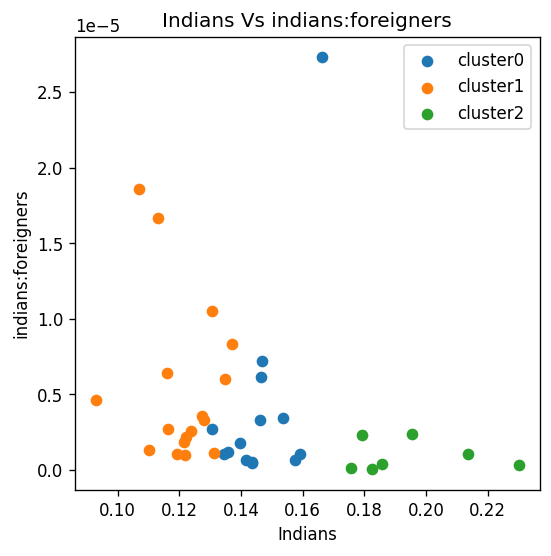

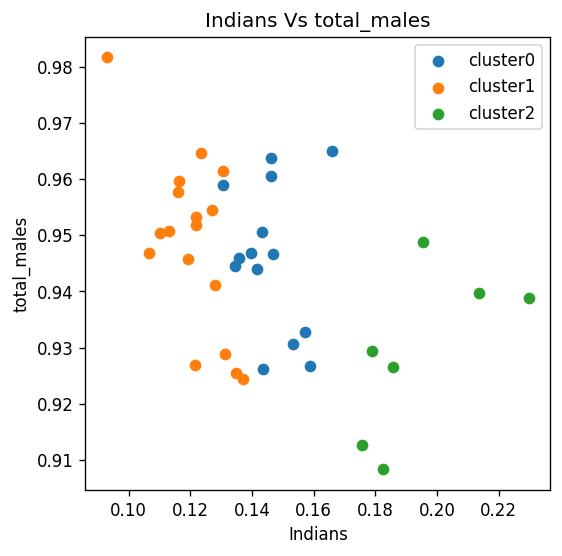

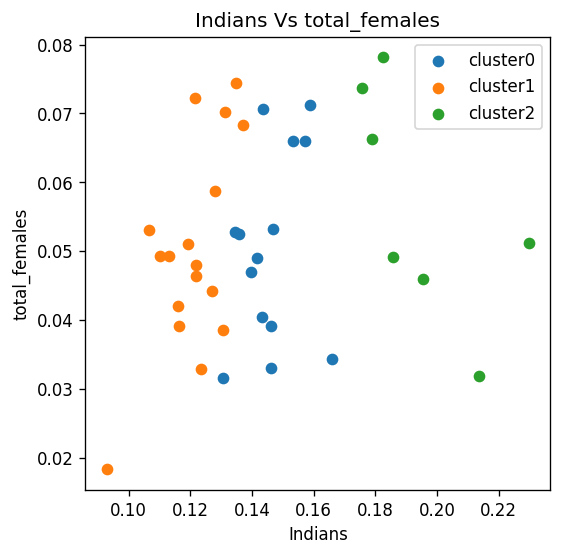

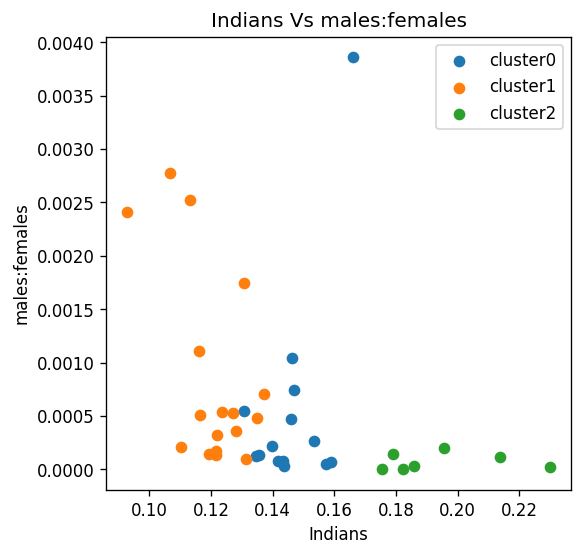

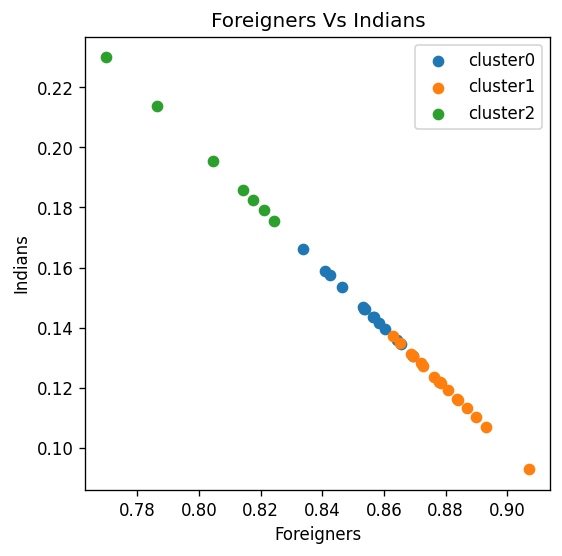

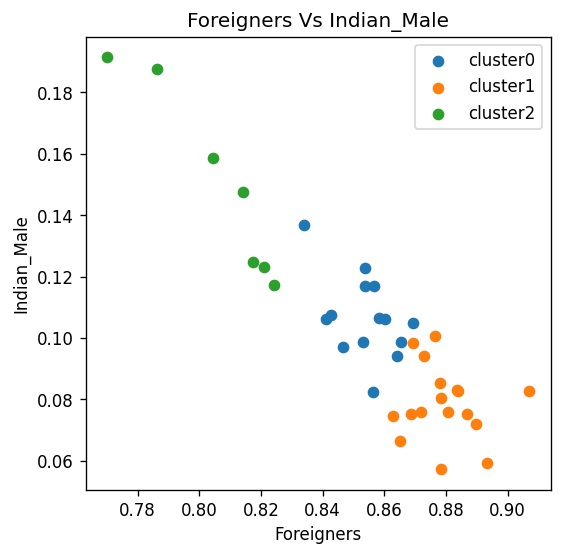

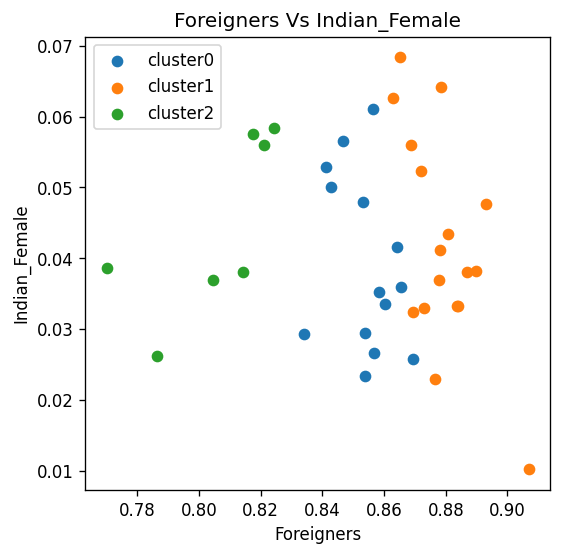

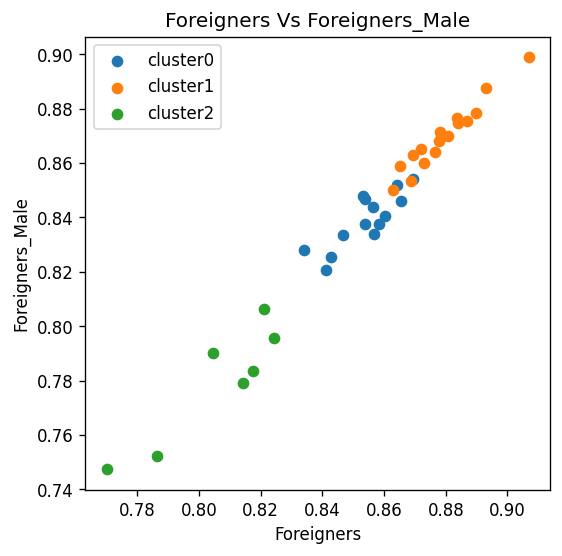

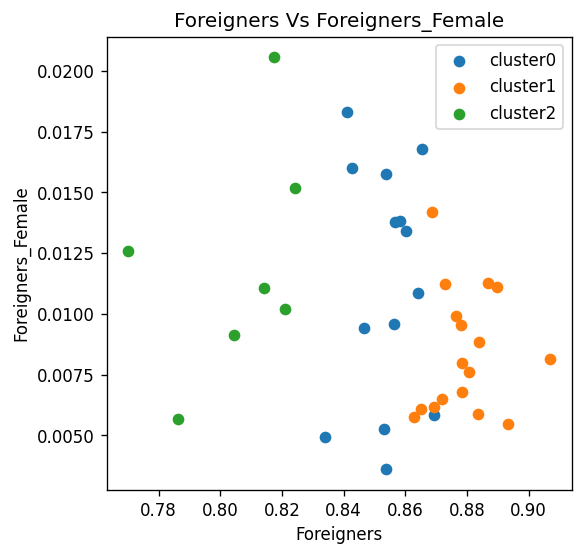

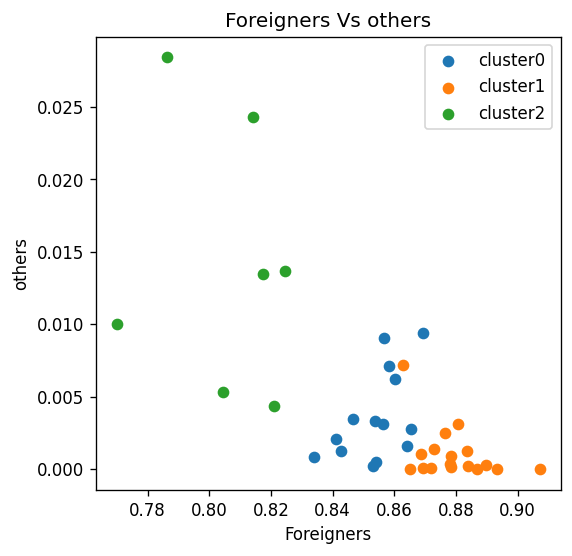

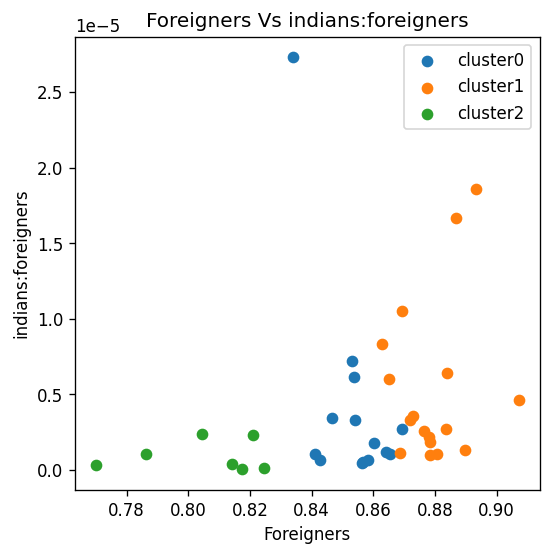

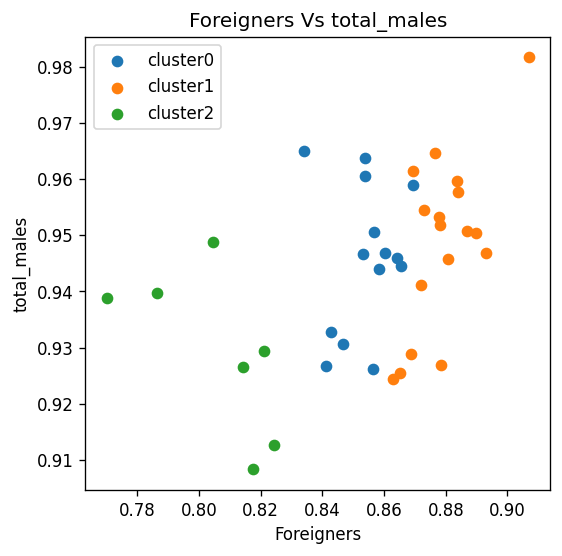

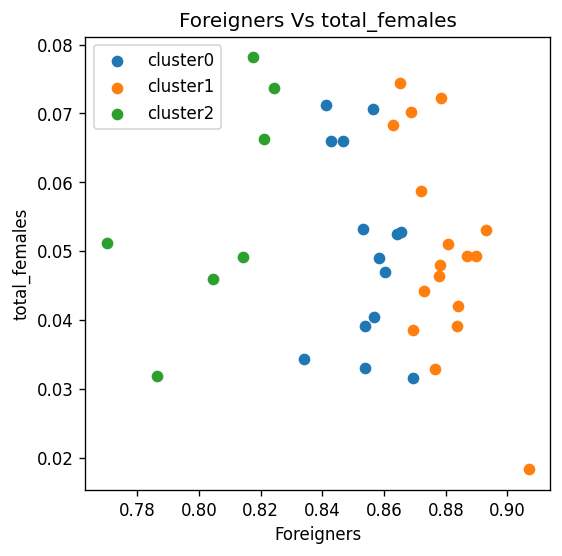

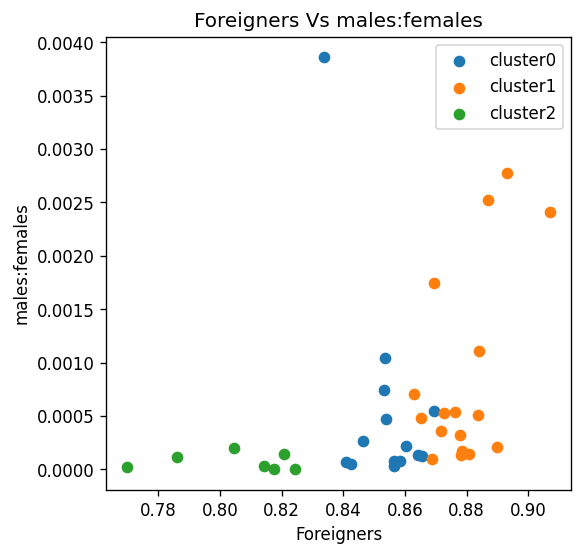

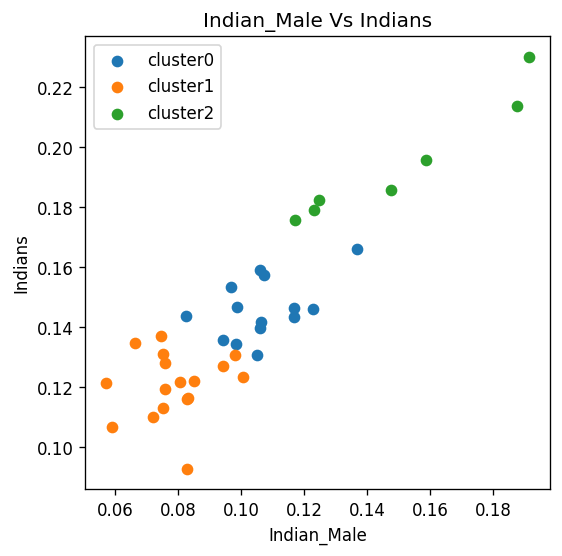

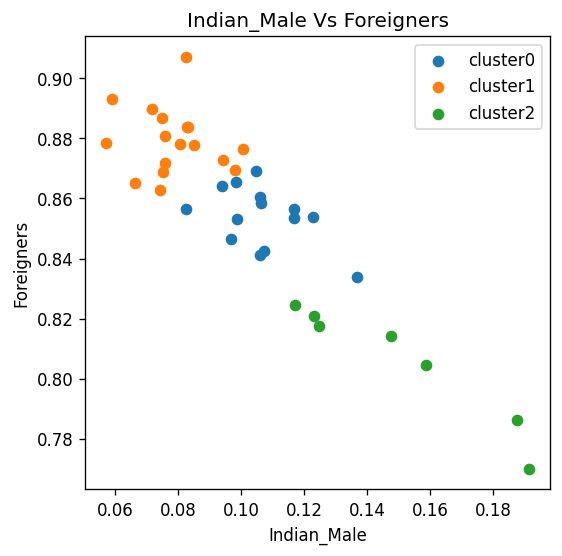

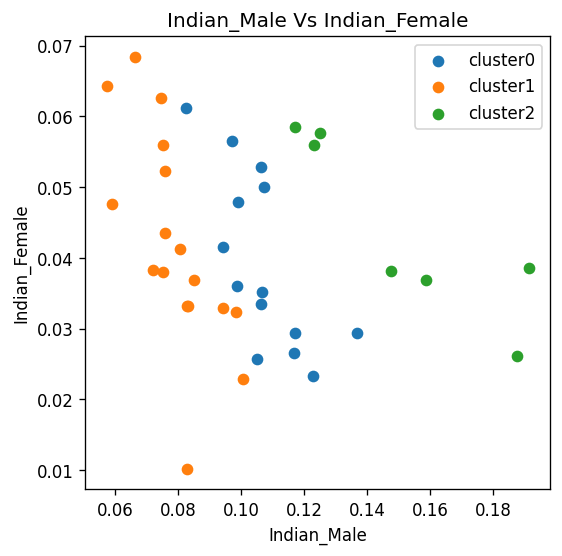

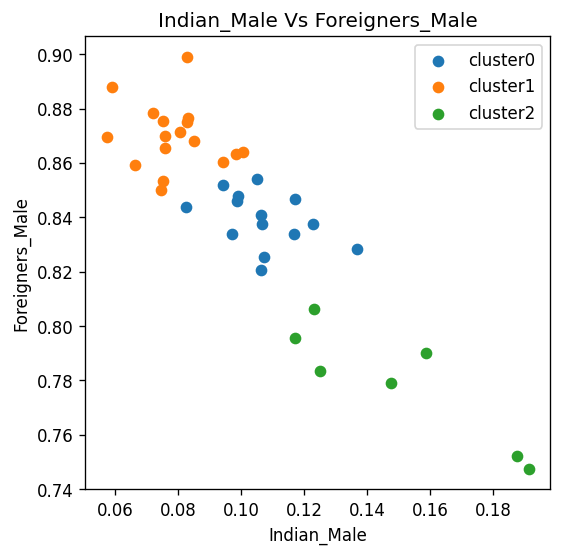

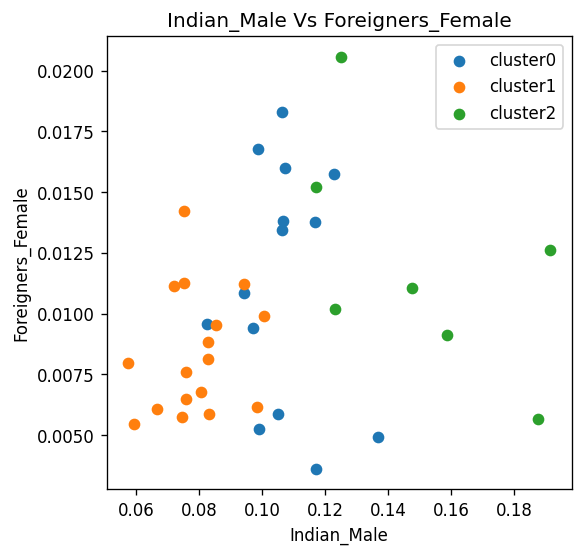

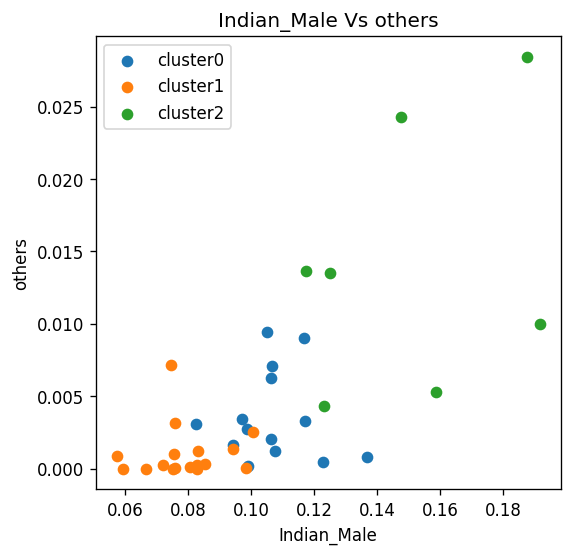

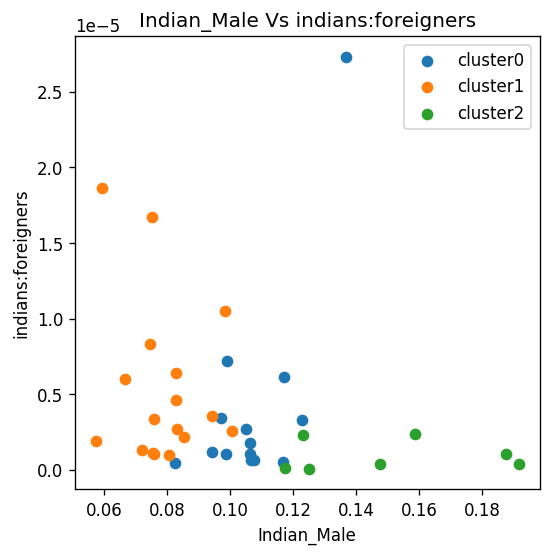

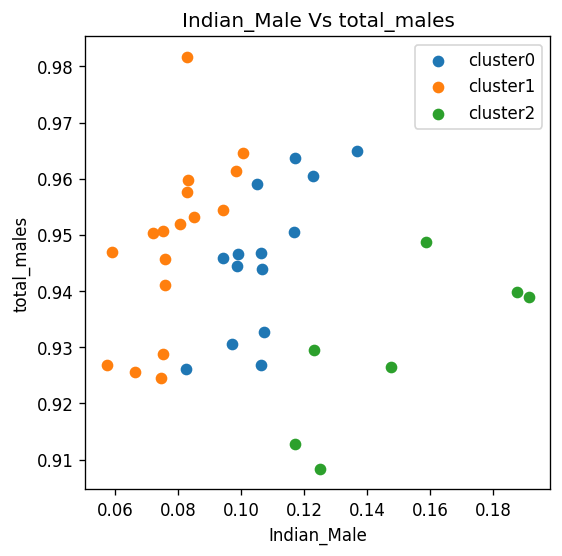

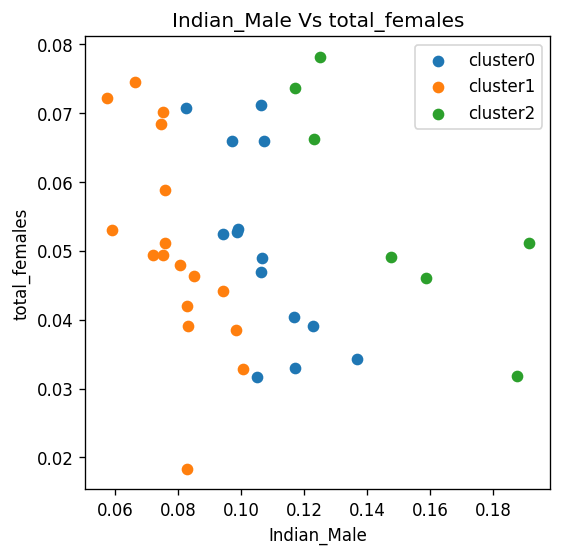

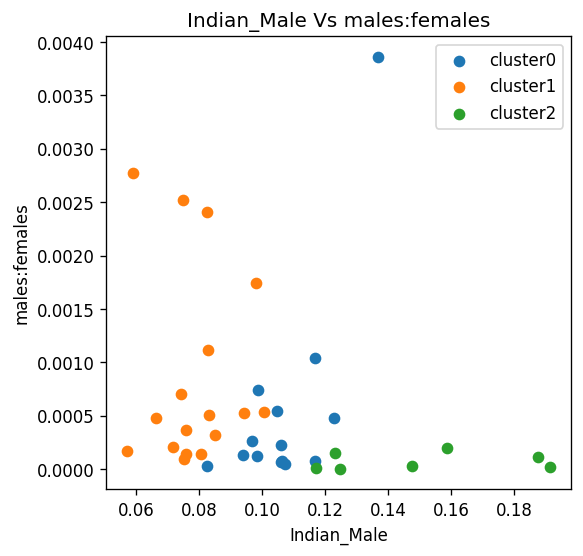

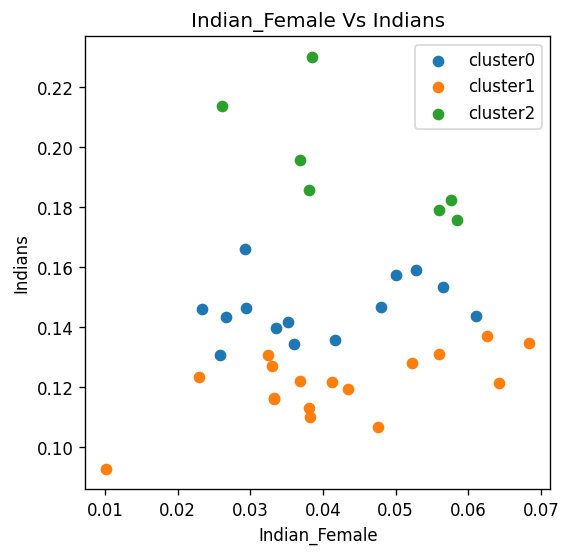

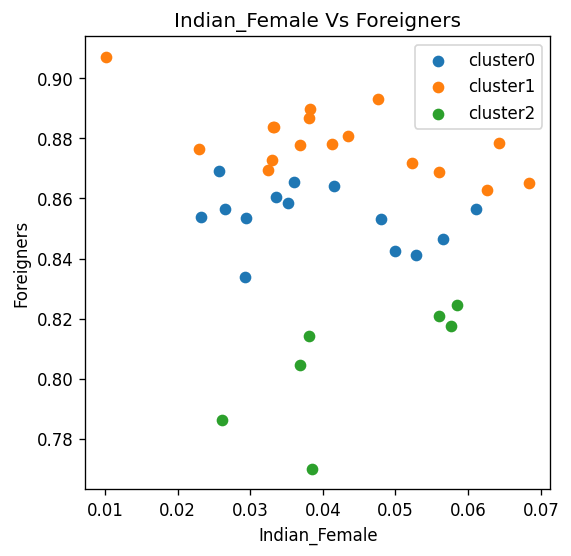

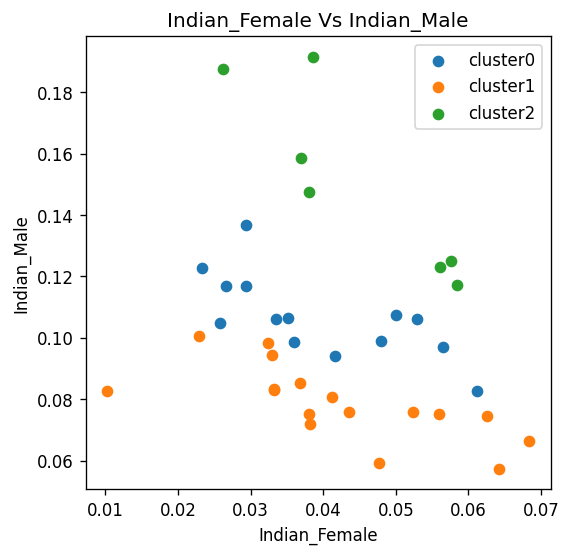

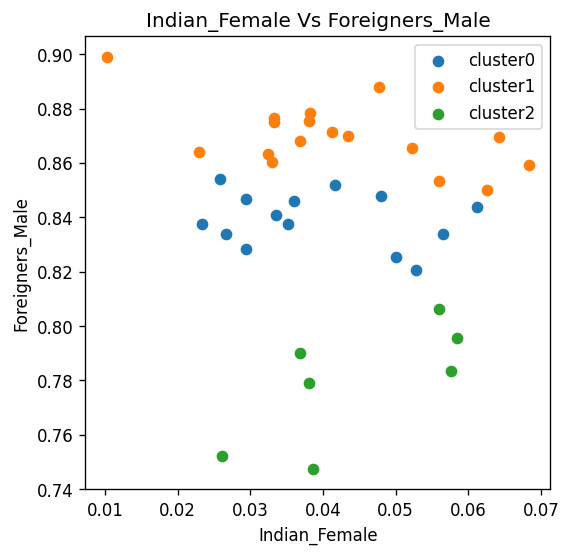

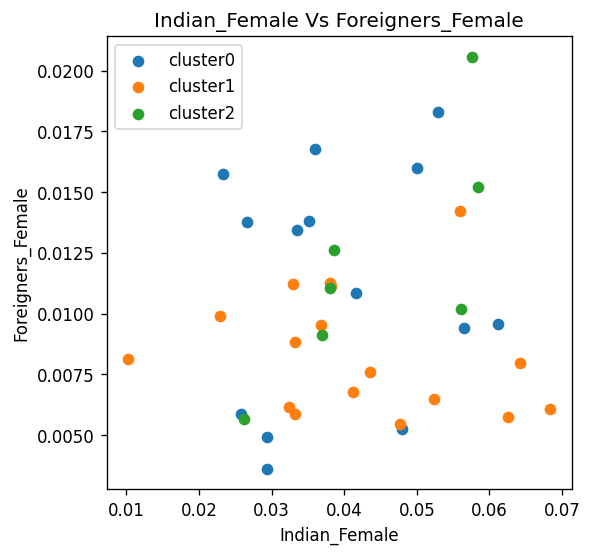

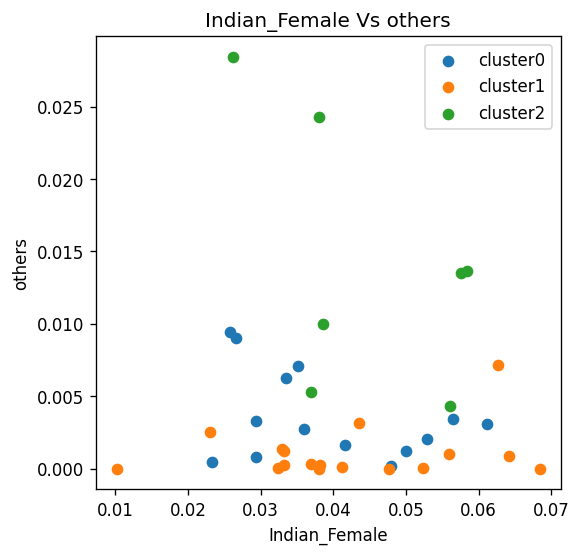

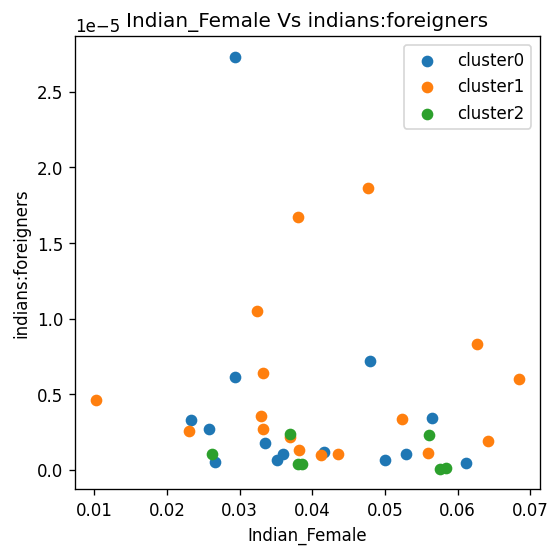

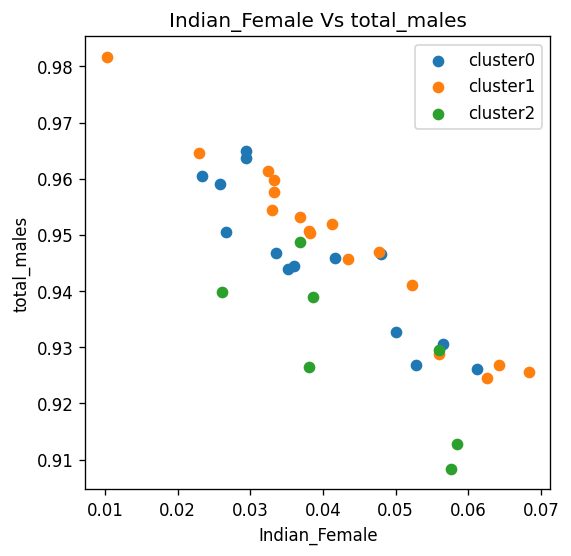

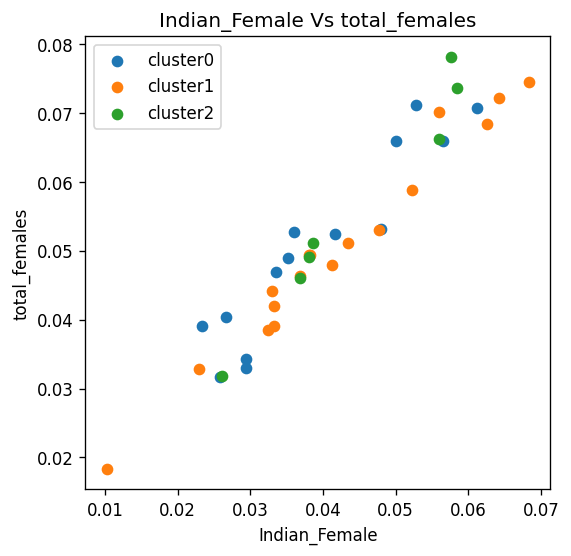

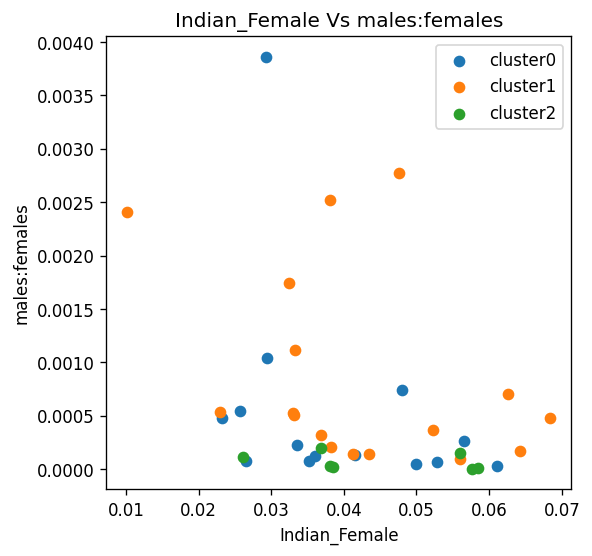

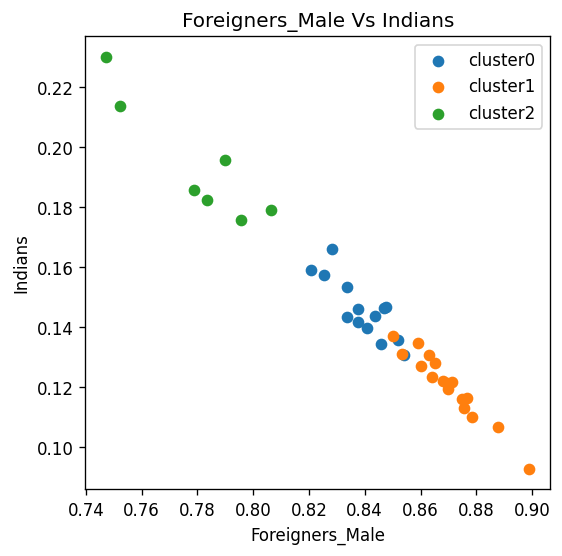

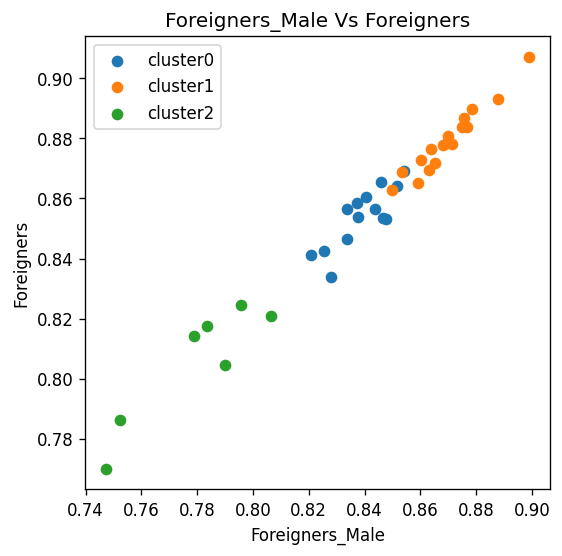

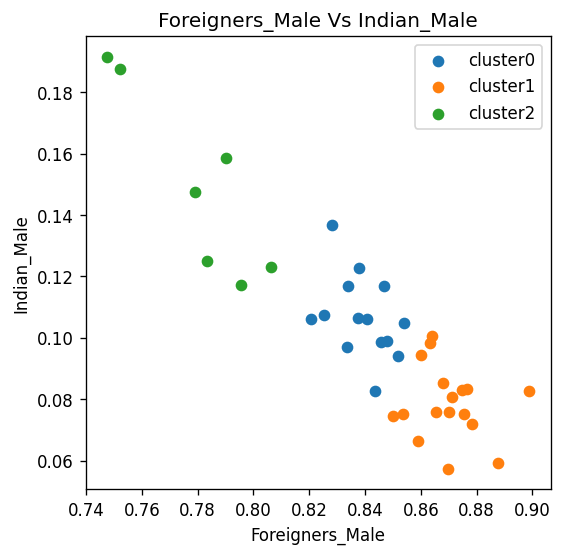

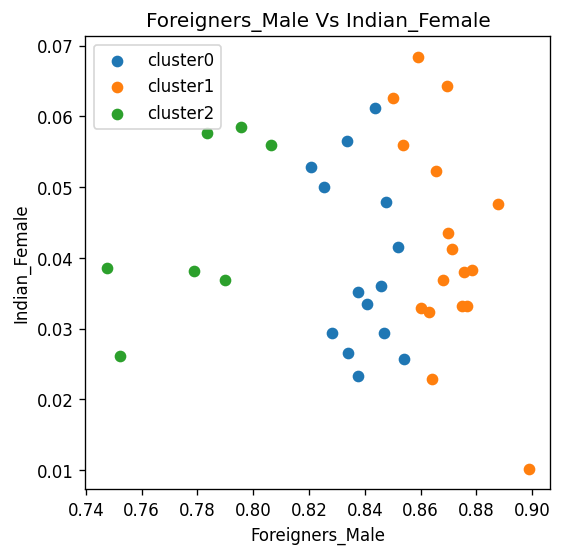

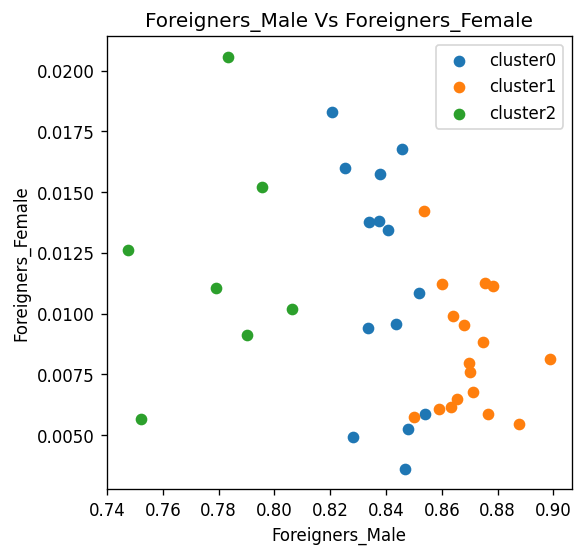

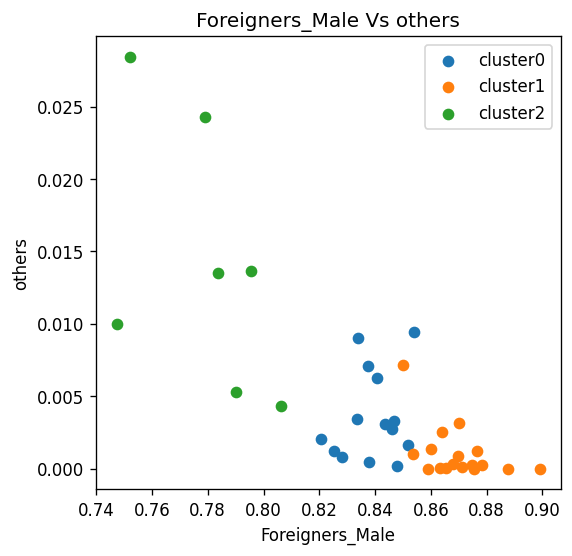

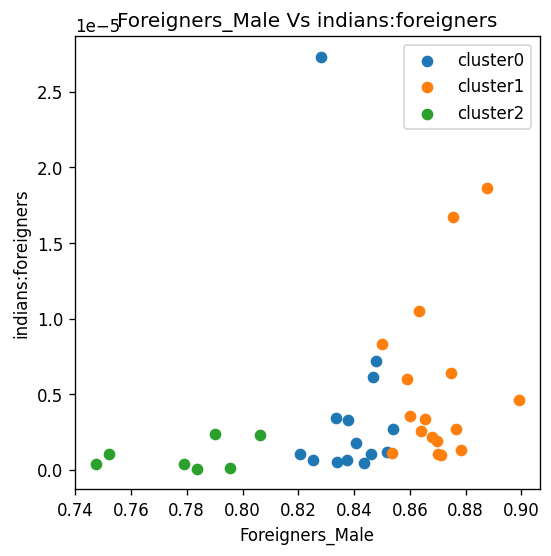

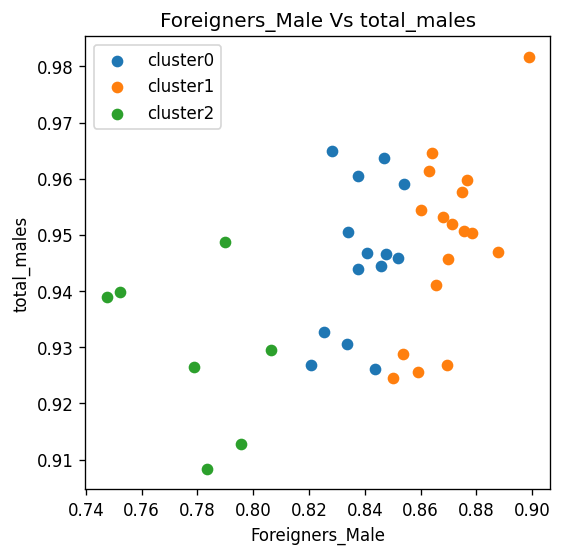

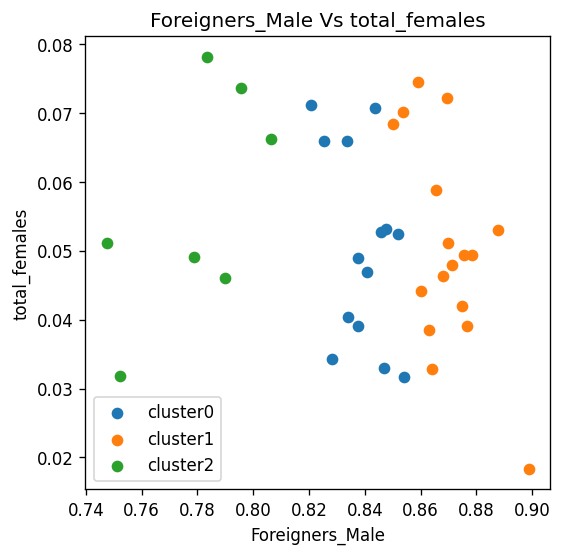

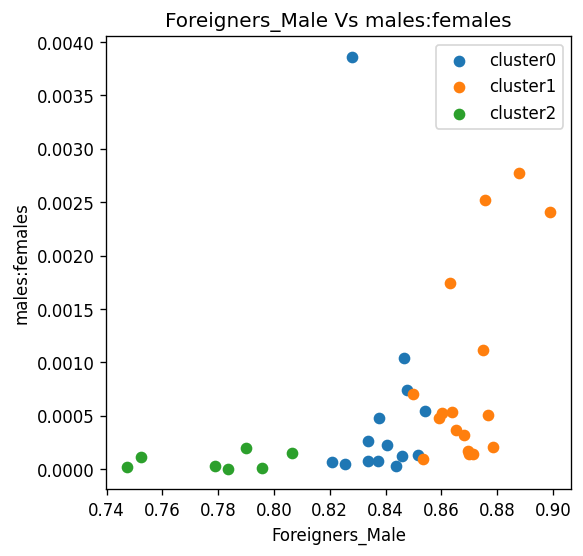

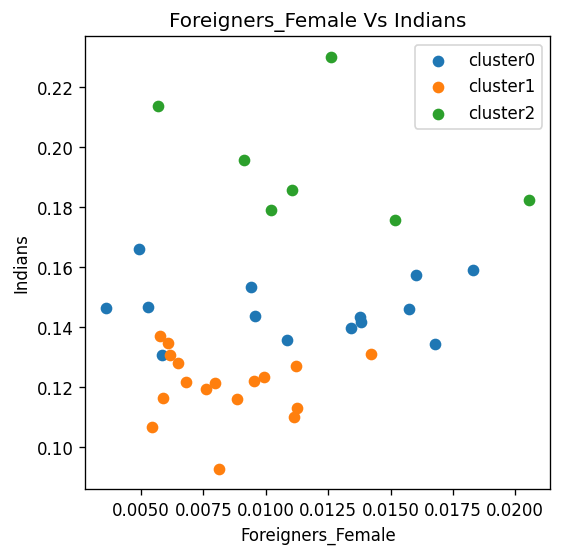

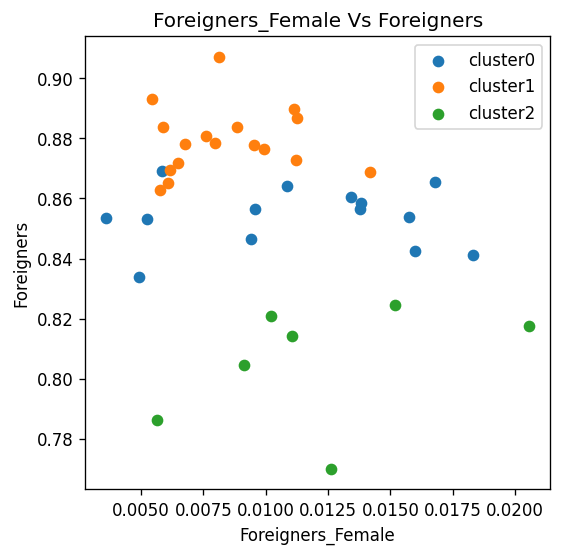

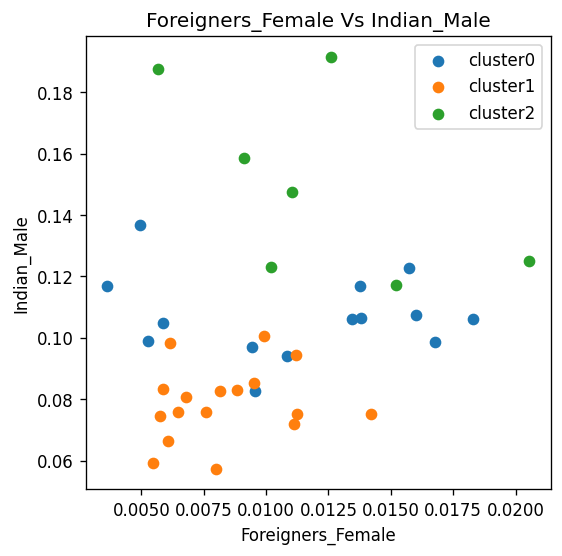

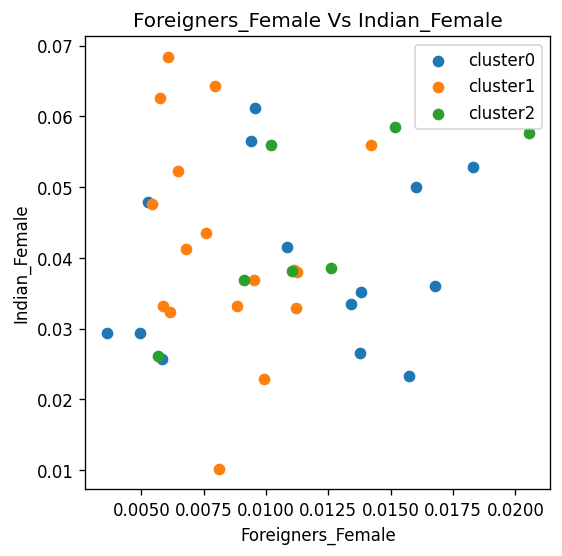

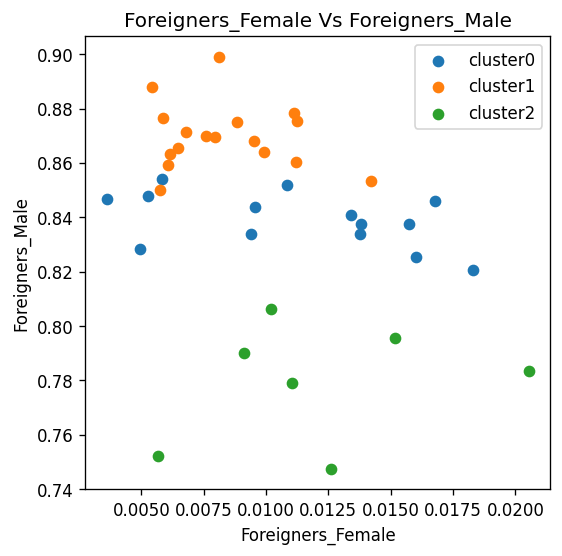

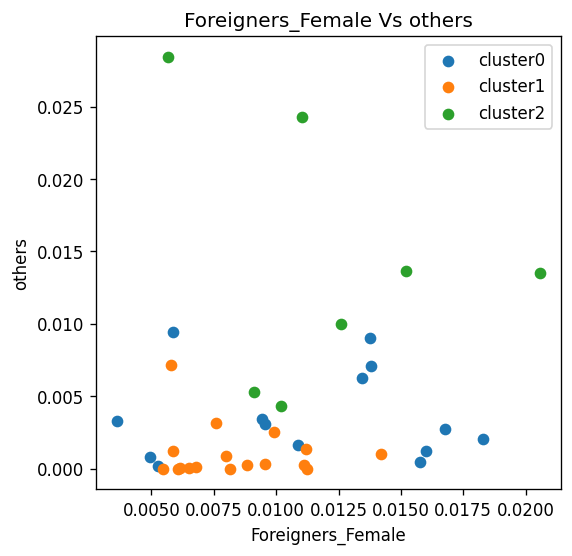

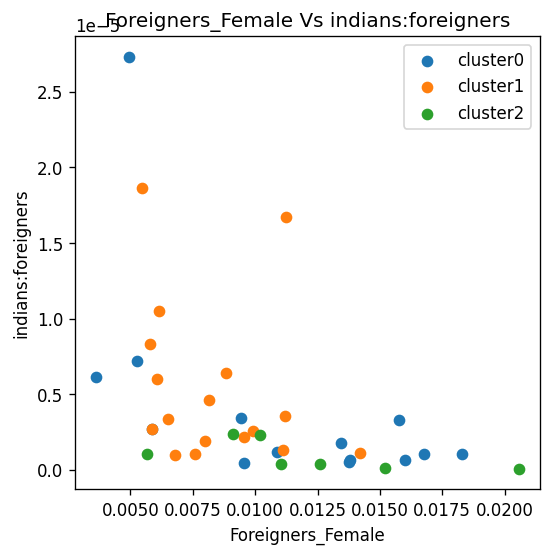

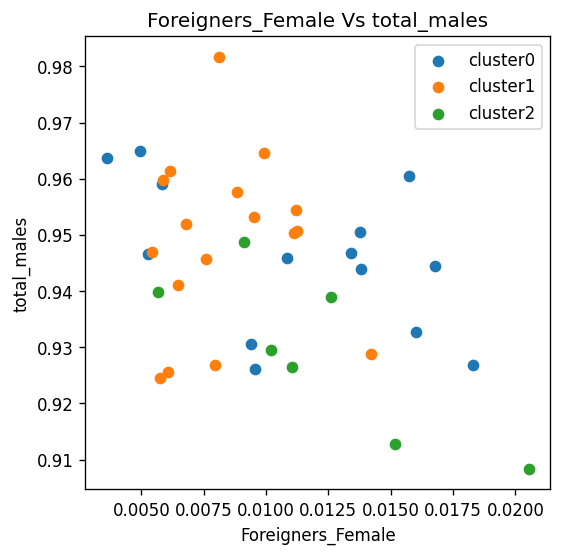

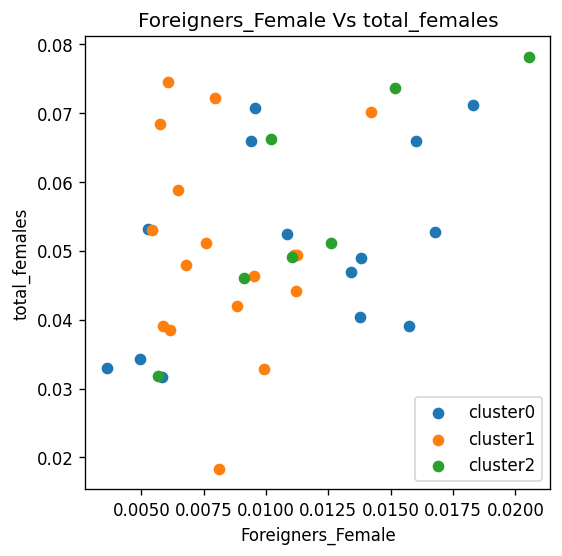

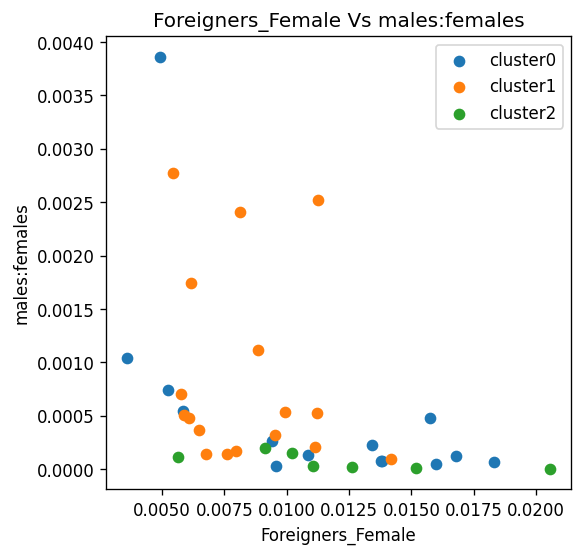

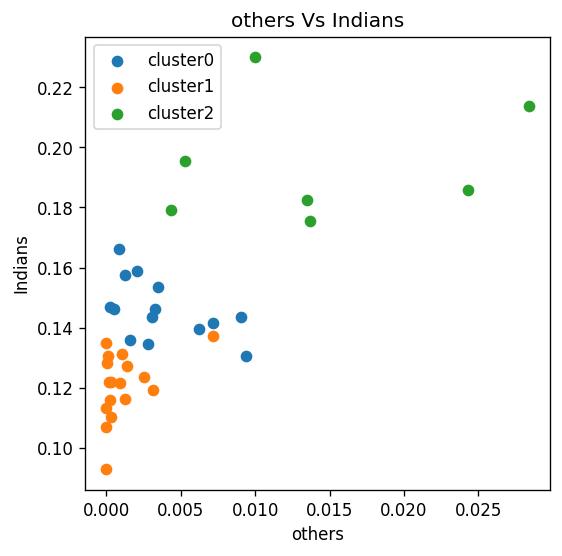

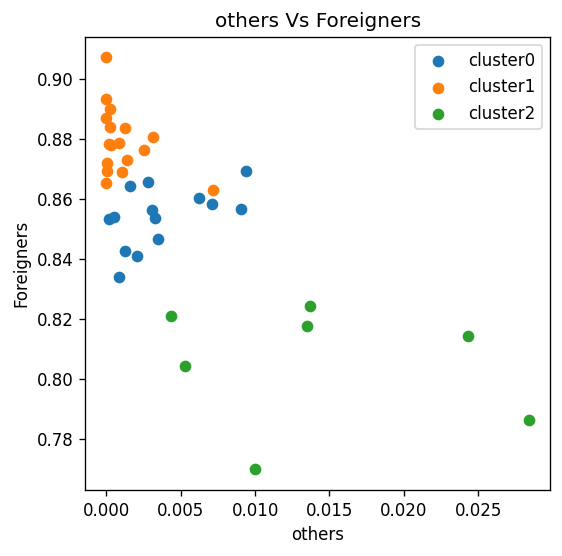

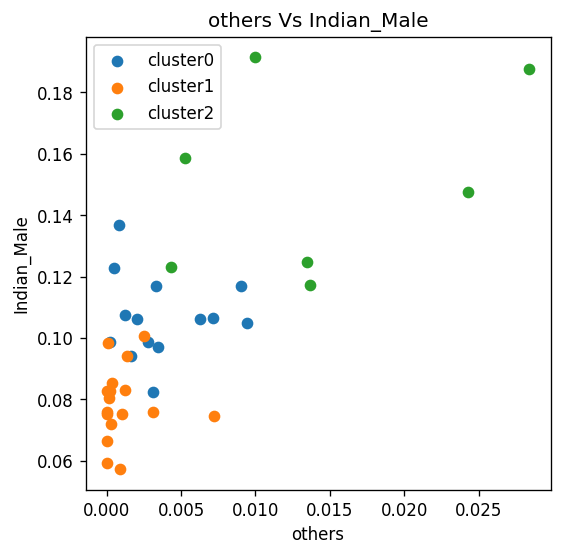

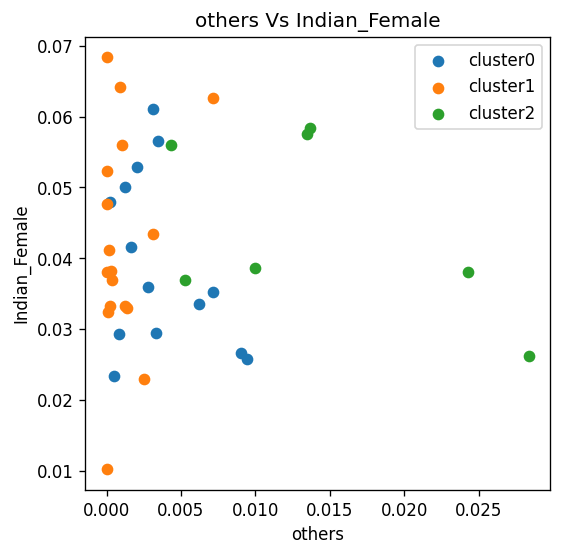

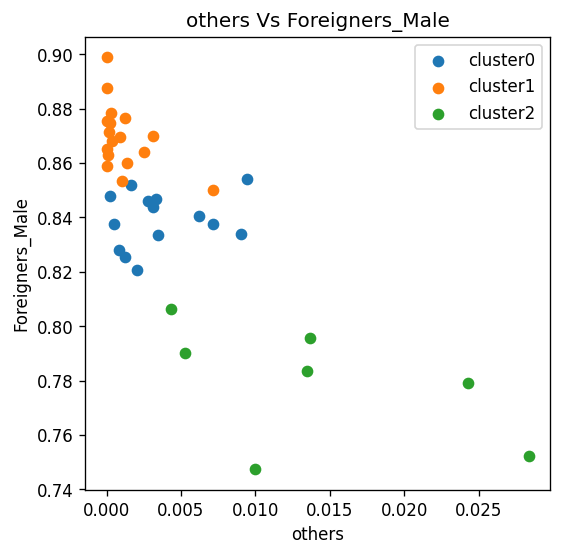

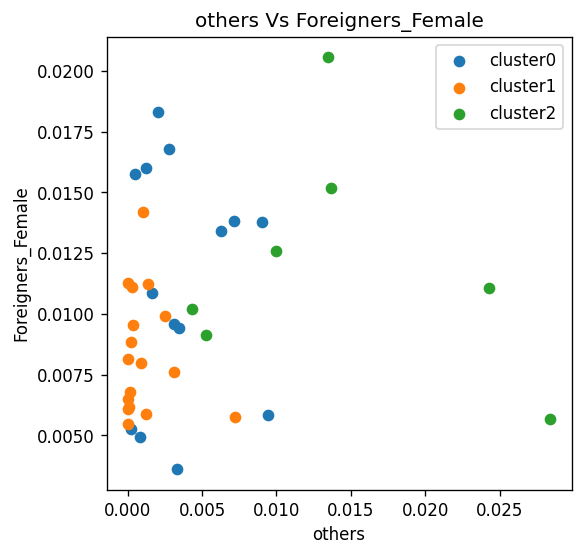

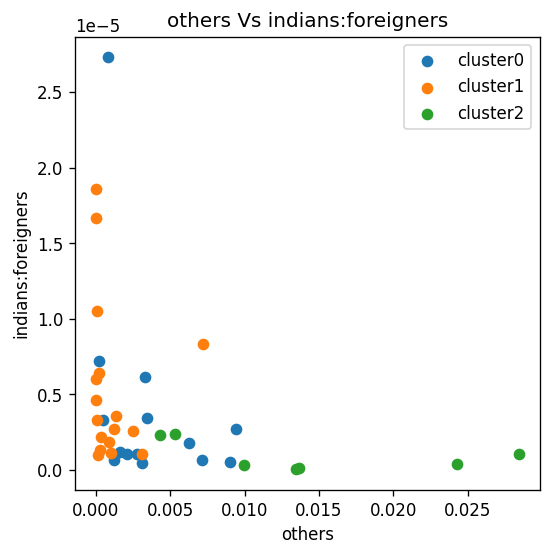

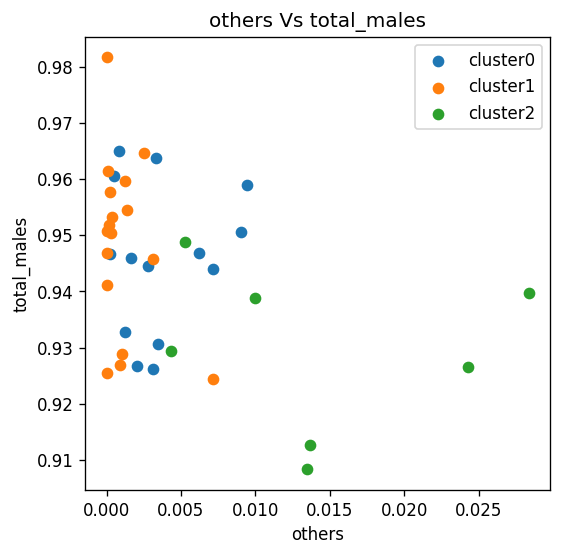

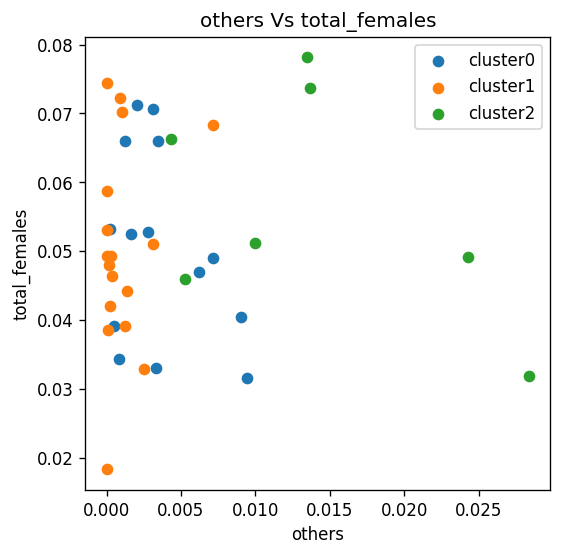

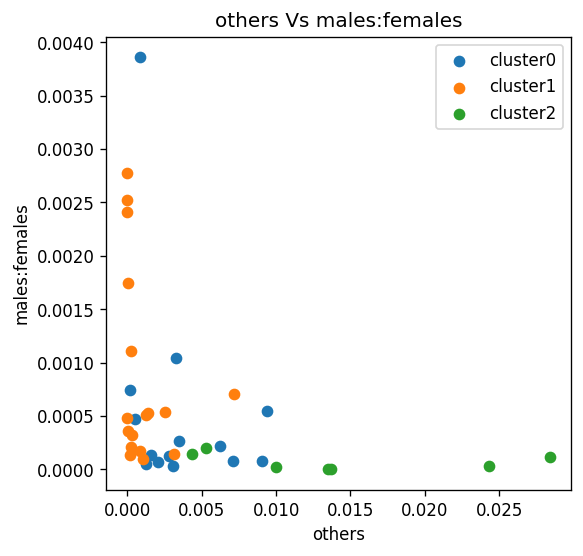

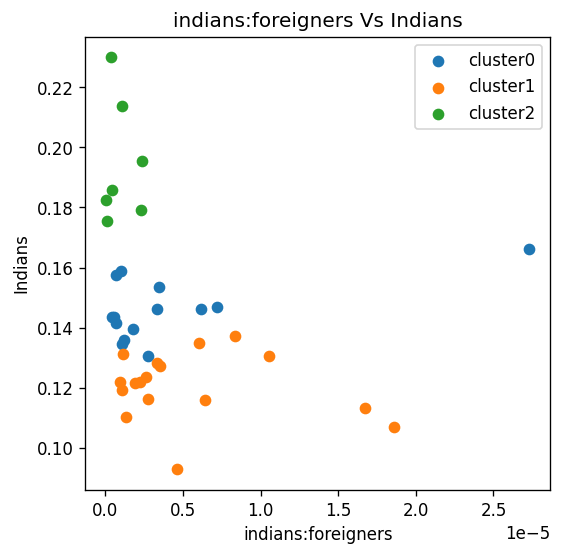

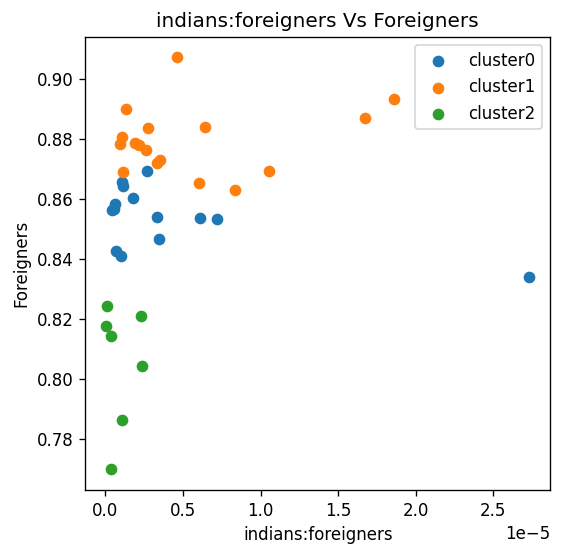

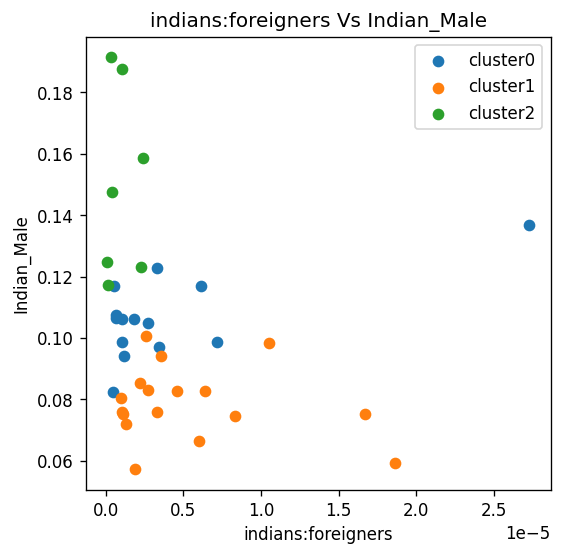

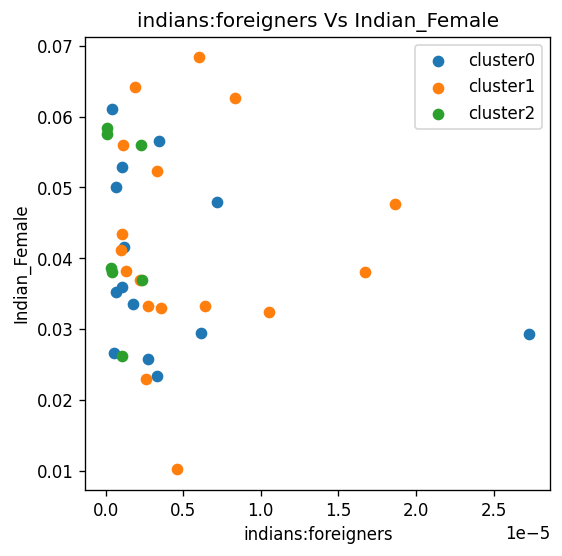

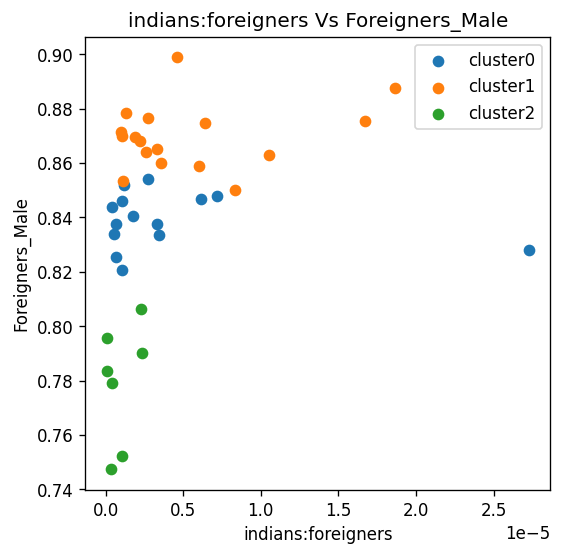

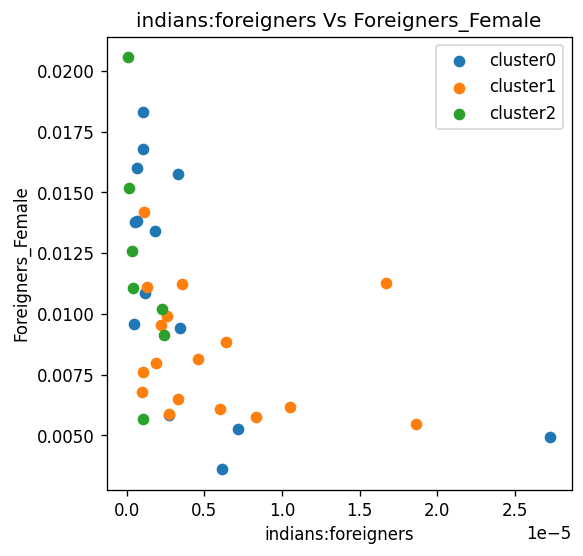

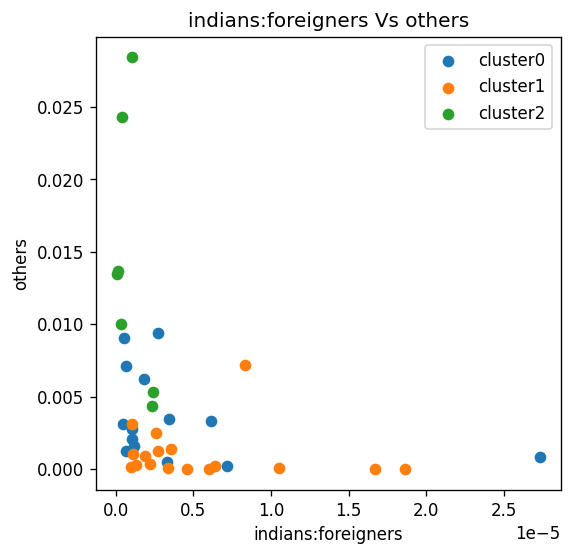

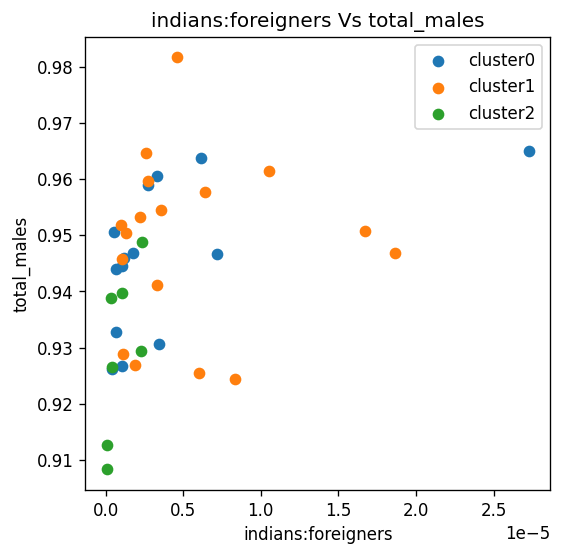

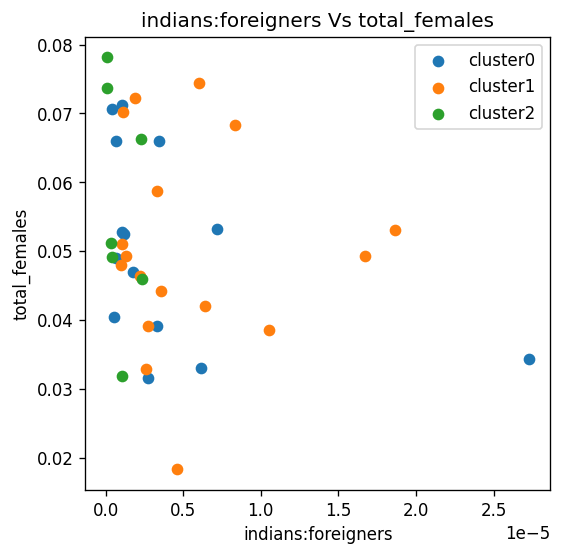

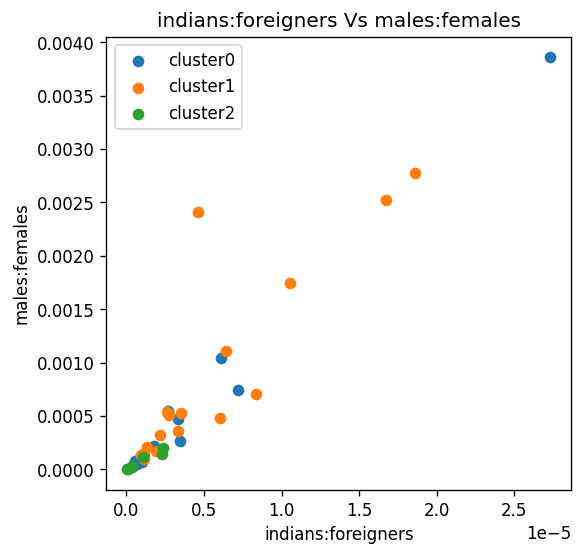

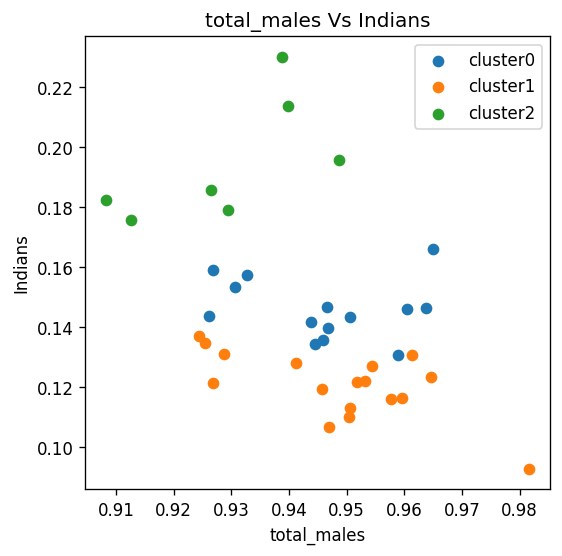

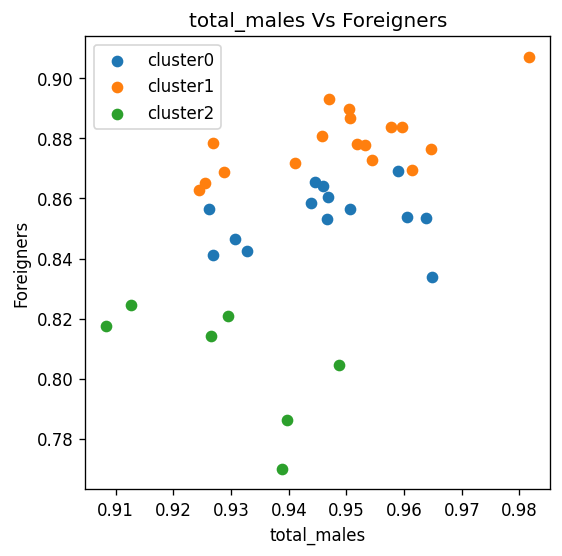

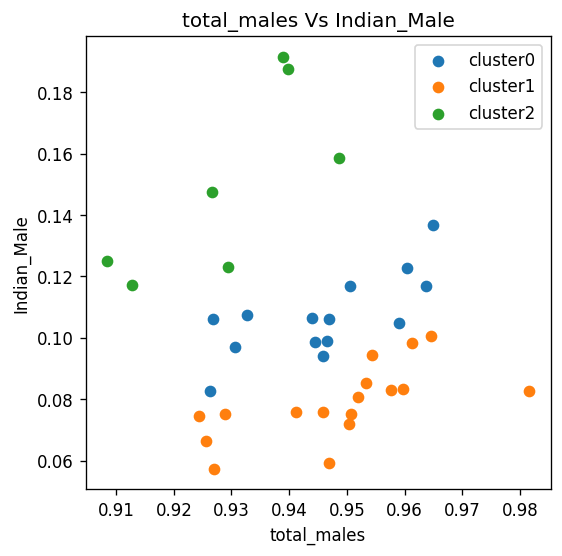

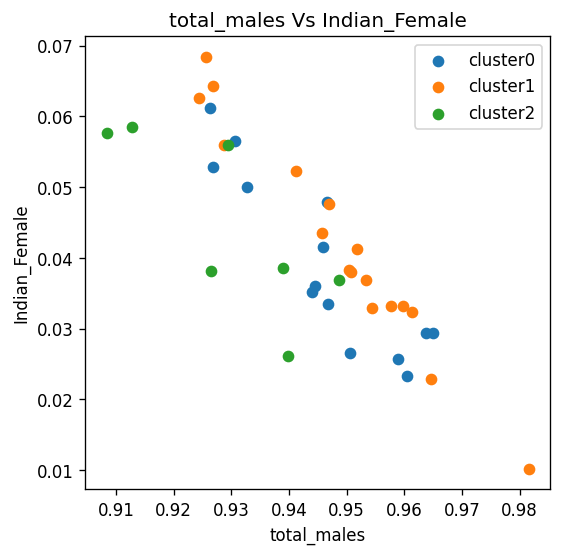

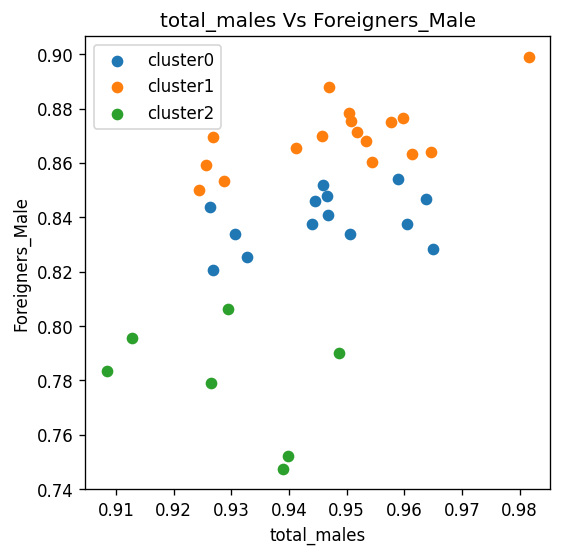

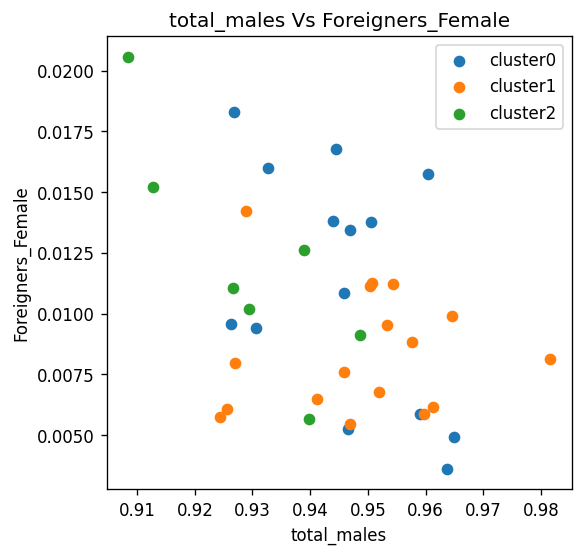

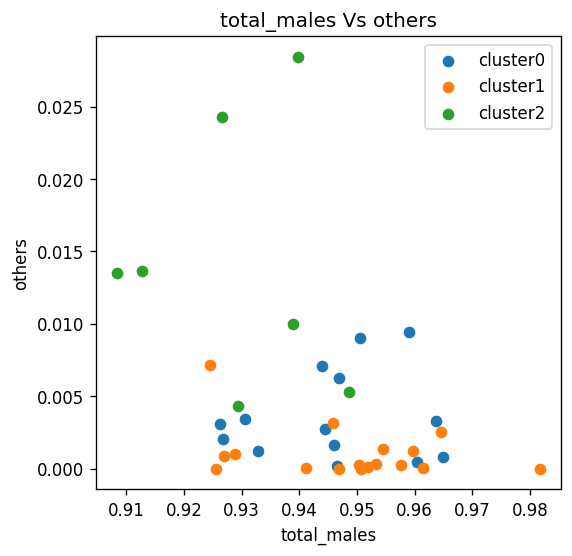

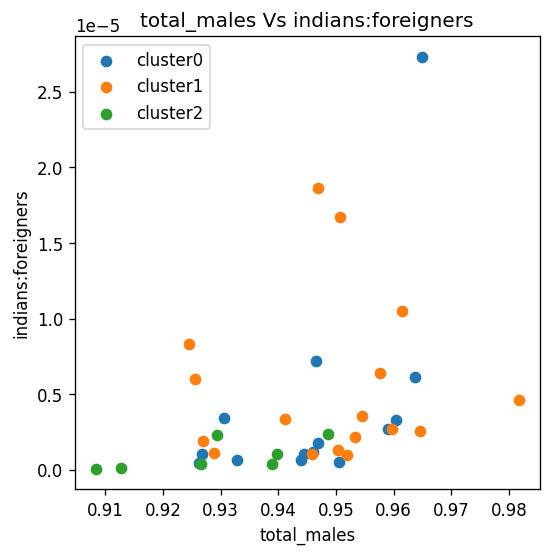

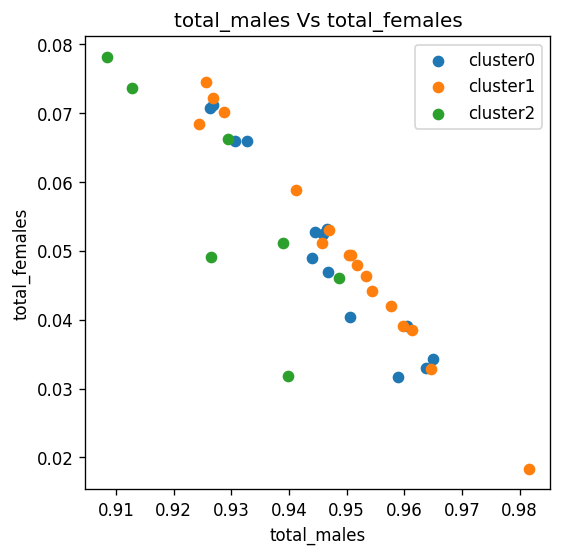

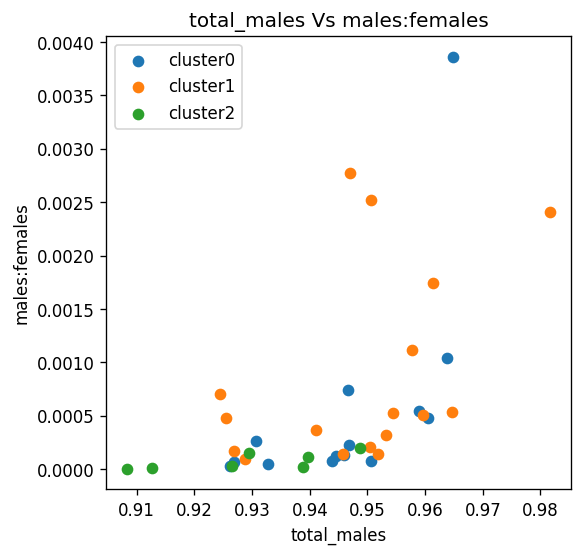

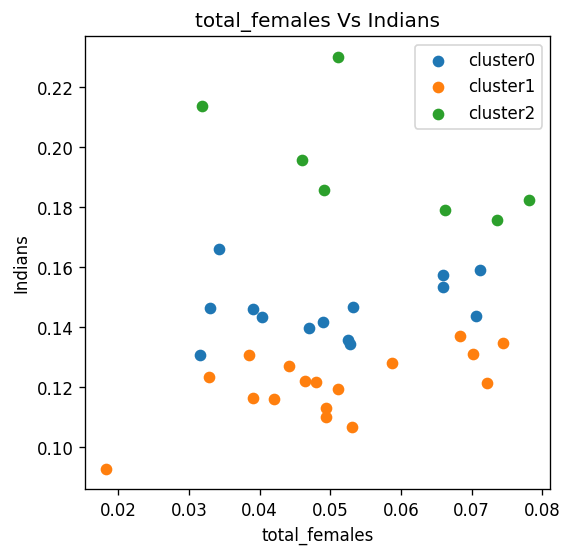

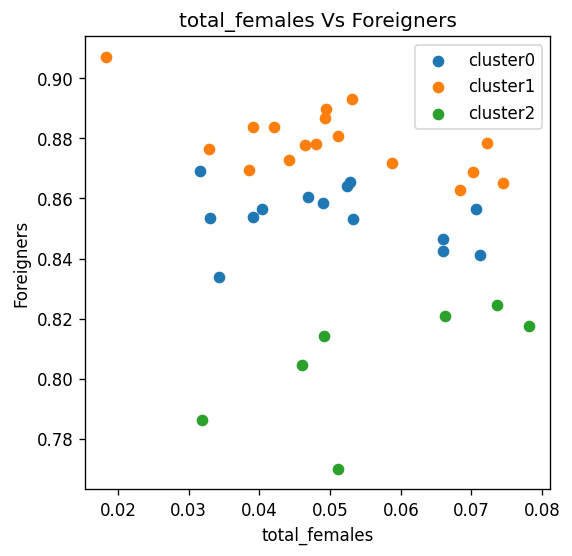

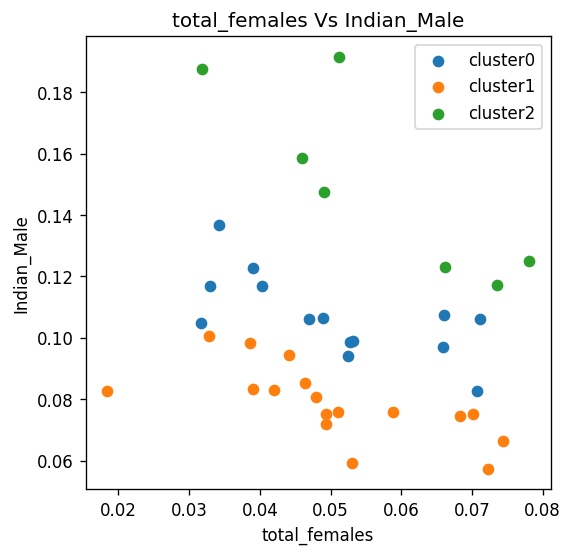

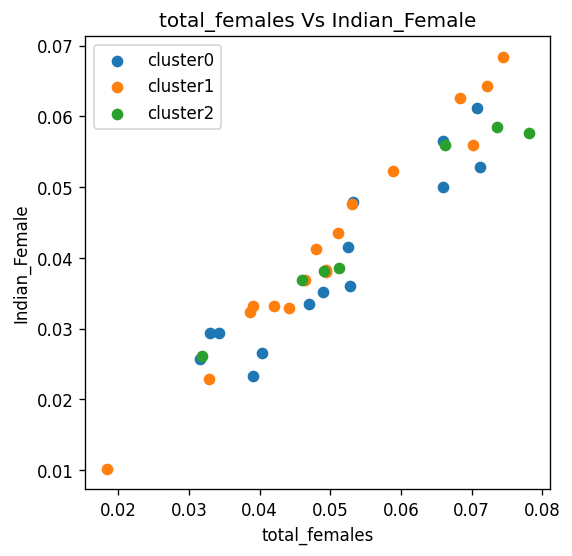

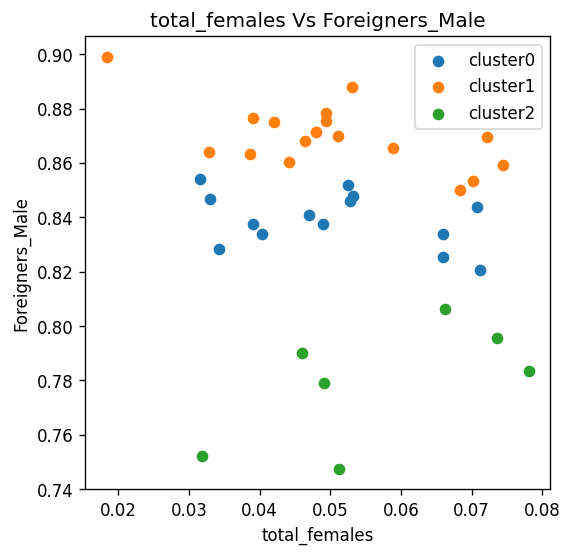

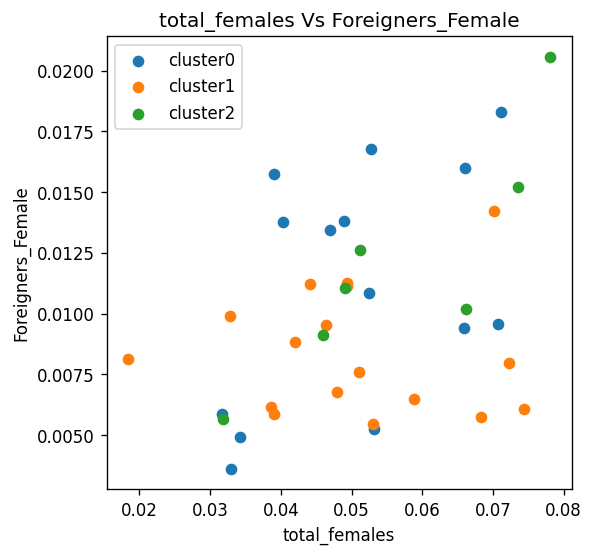

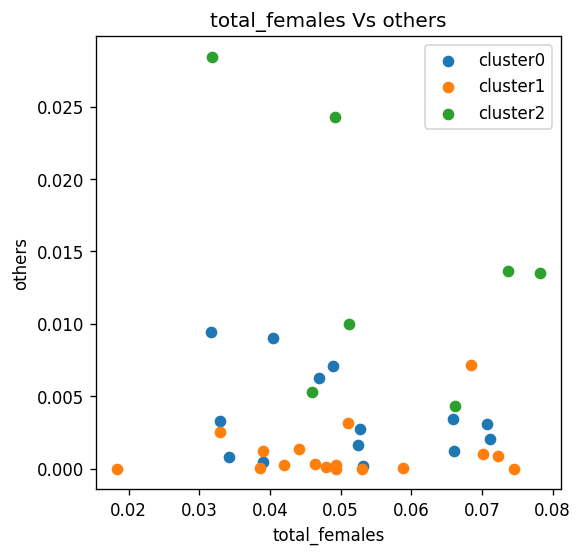

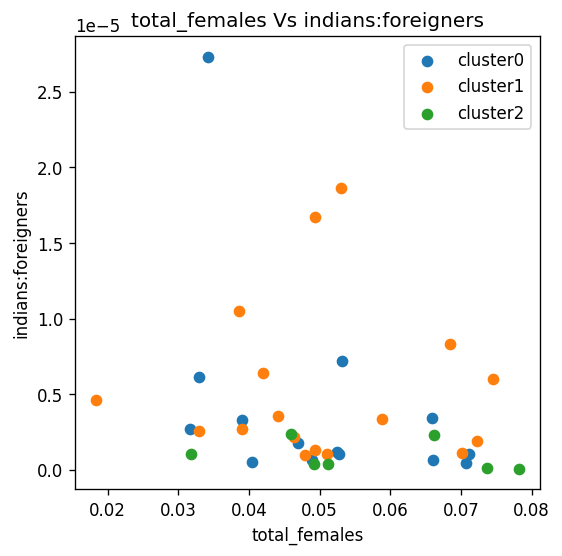

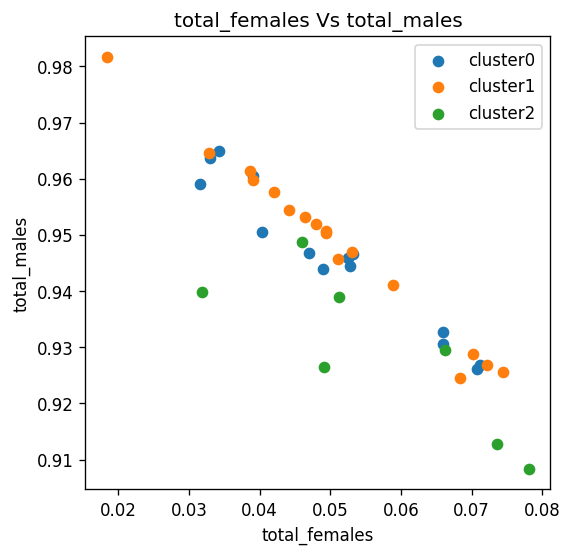

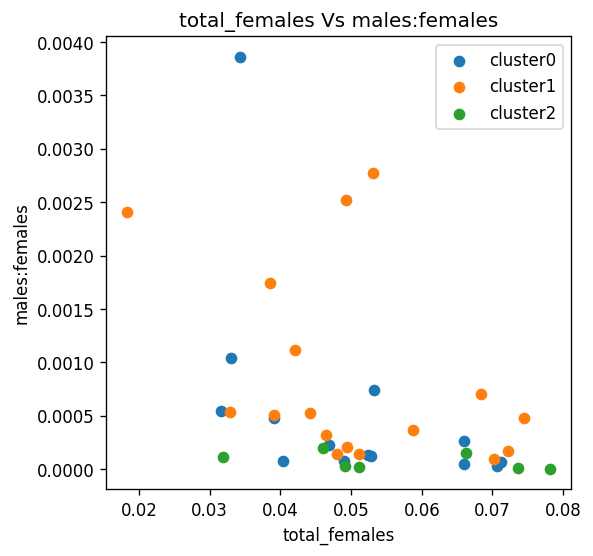

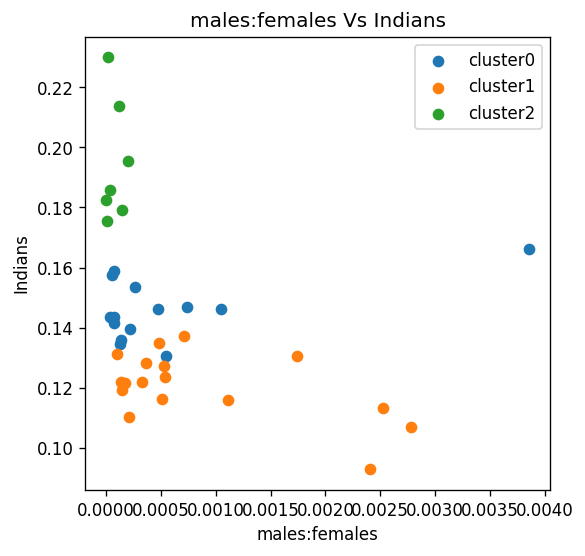

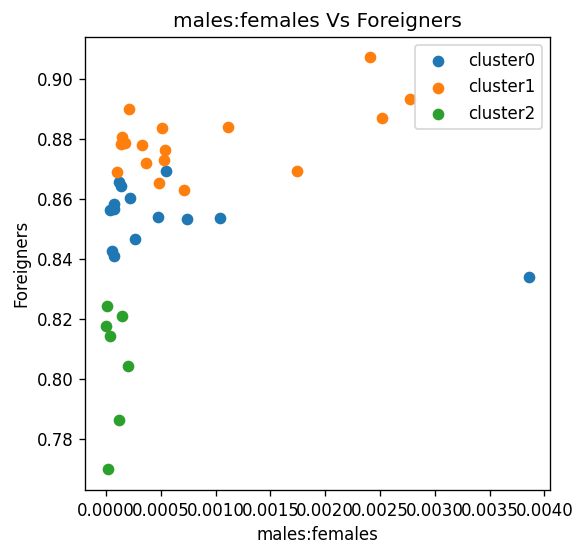

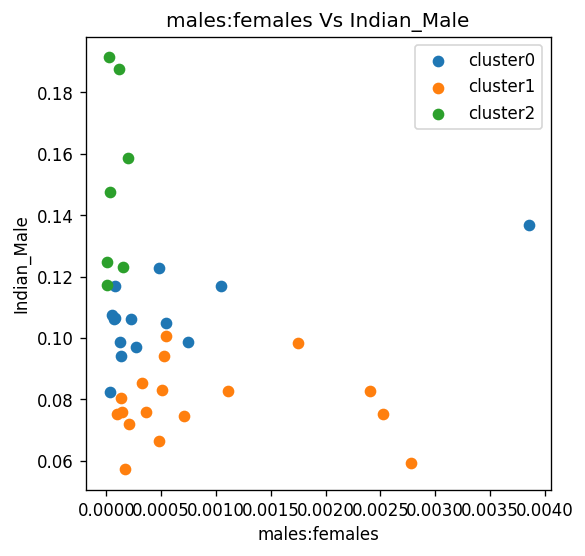

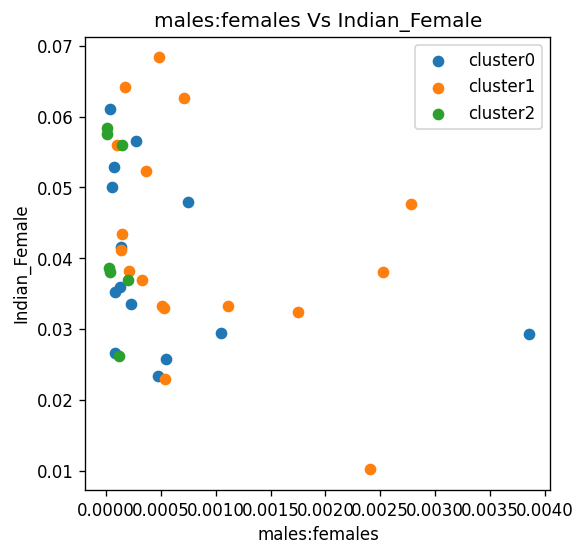

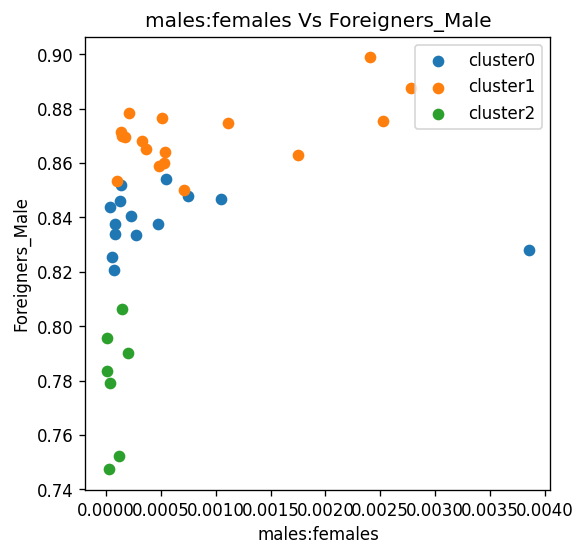

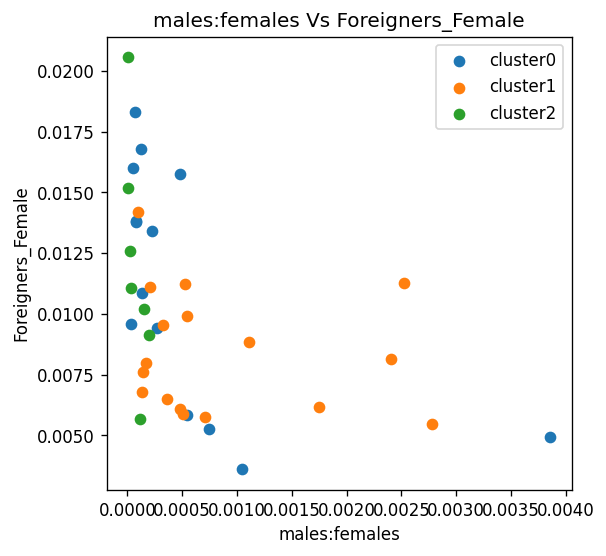

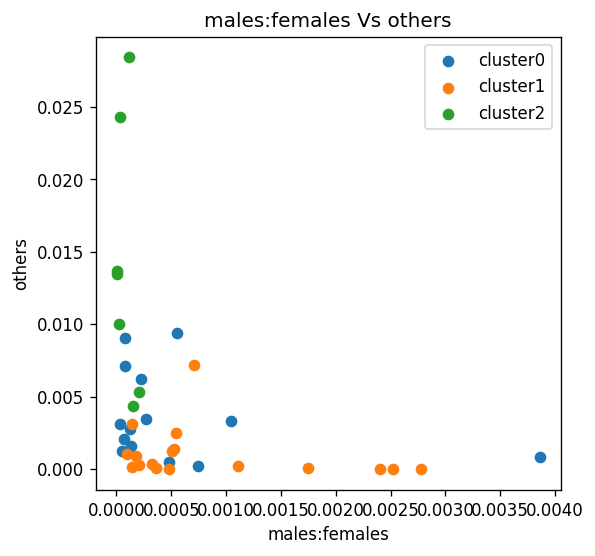

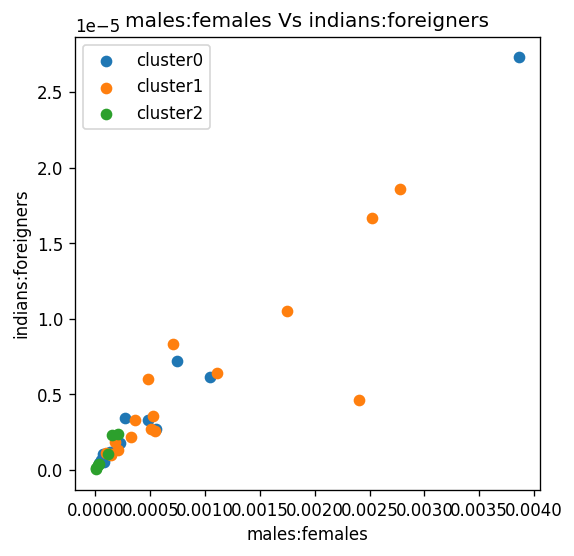

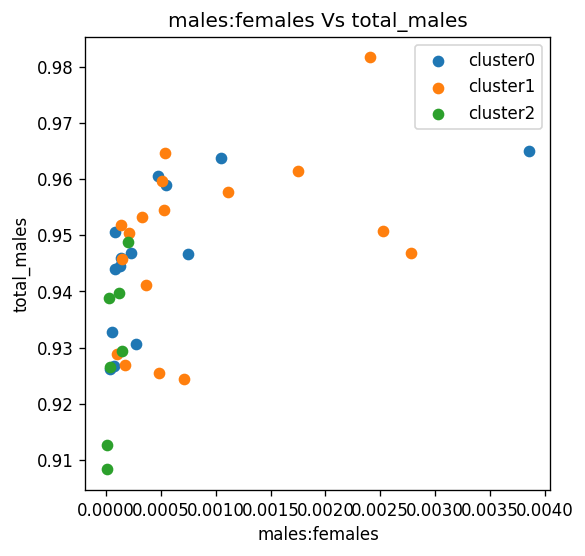

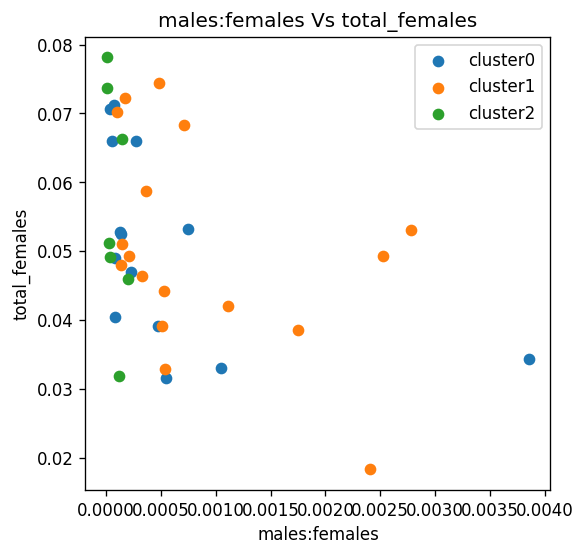

In [35]:
#  to view clusters between all the features combination

for x in data2.drop(columns=['cluster']).columns:
    for y in data2.drop(columns=['cluster']).columns:
        if x!=y:
            plot_clusters(x,y,3)
            